## Setting up Environment and Previewing Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import itertools
import scipy

In [2]:
#adjusting jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# importing dataset

from dotenv import load_dotenv

load_dotenv()

dataset_path = os.getenv('DATASET_PATH')

application_df = pd.read_csv(dataset_path) 

In [4]:
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [6]:
# listing all columns
list(application_df)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## Visualizing Null Values

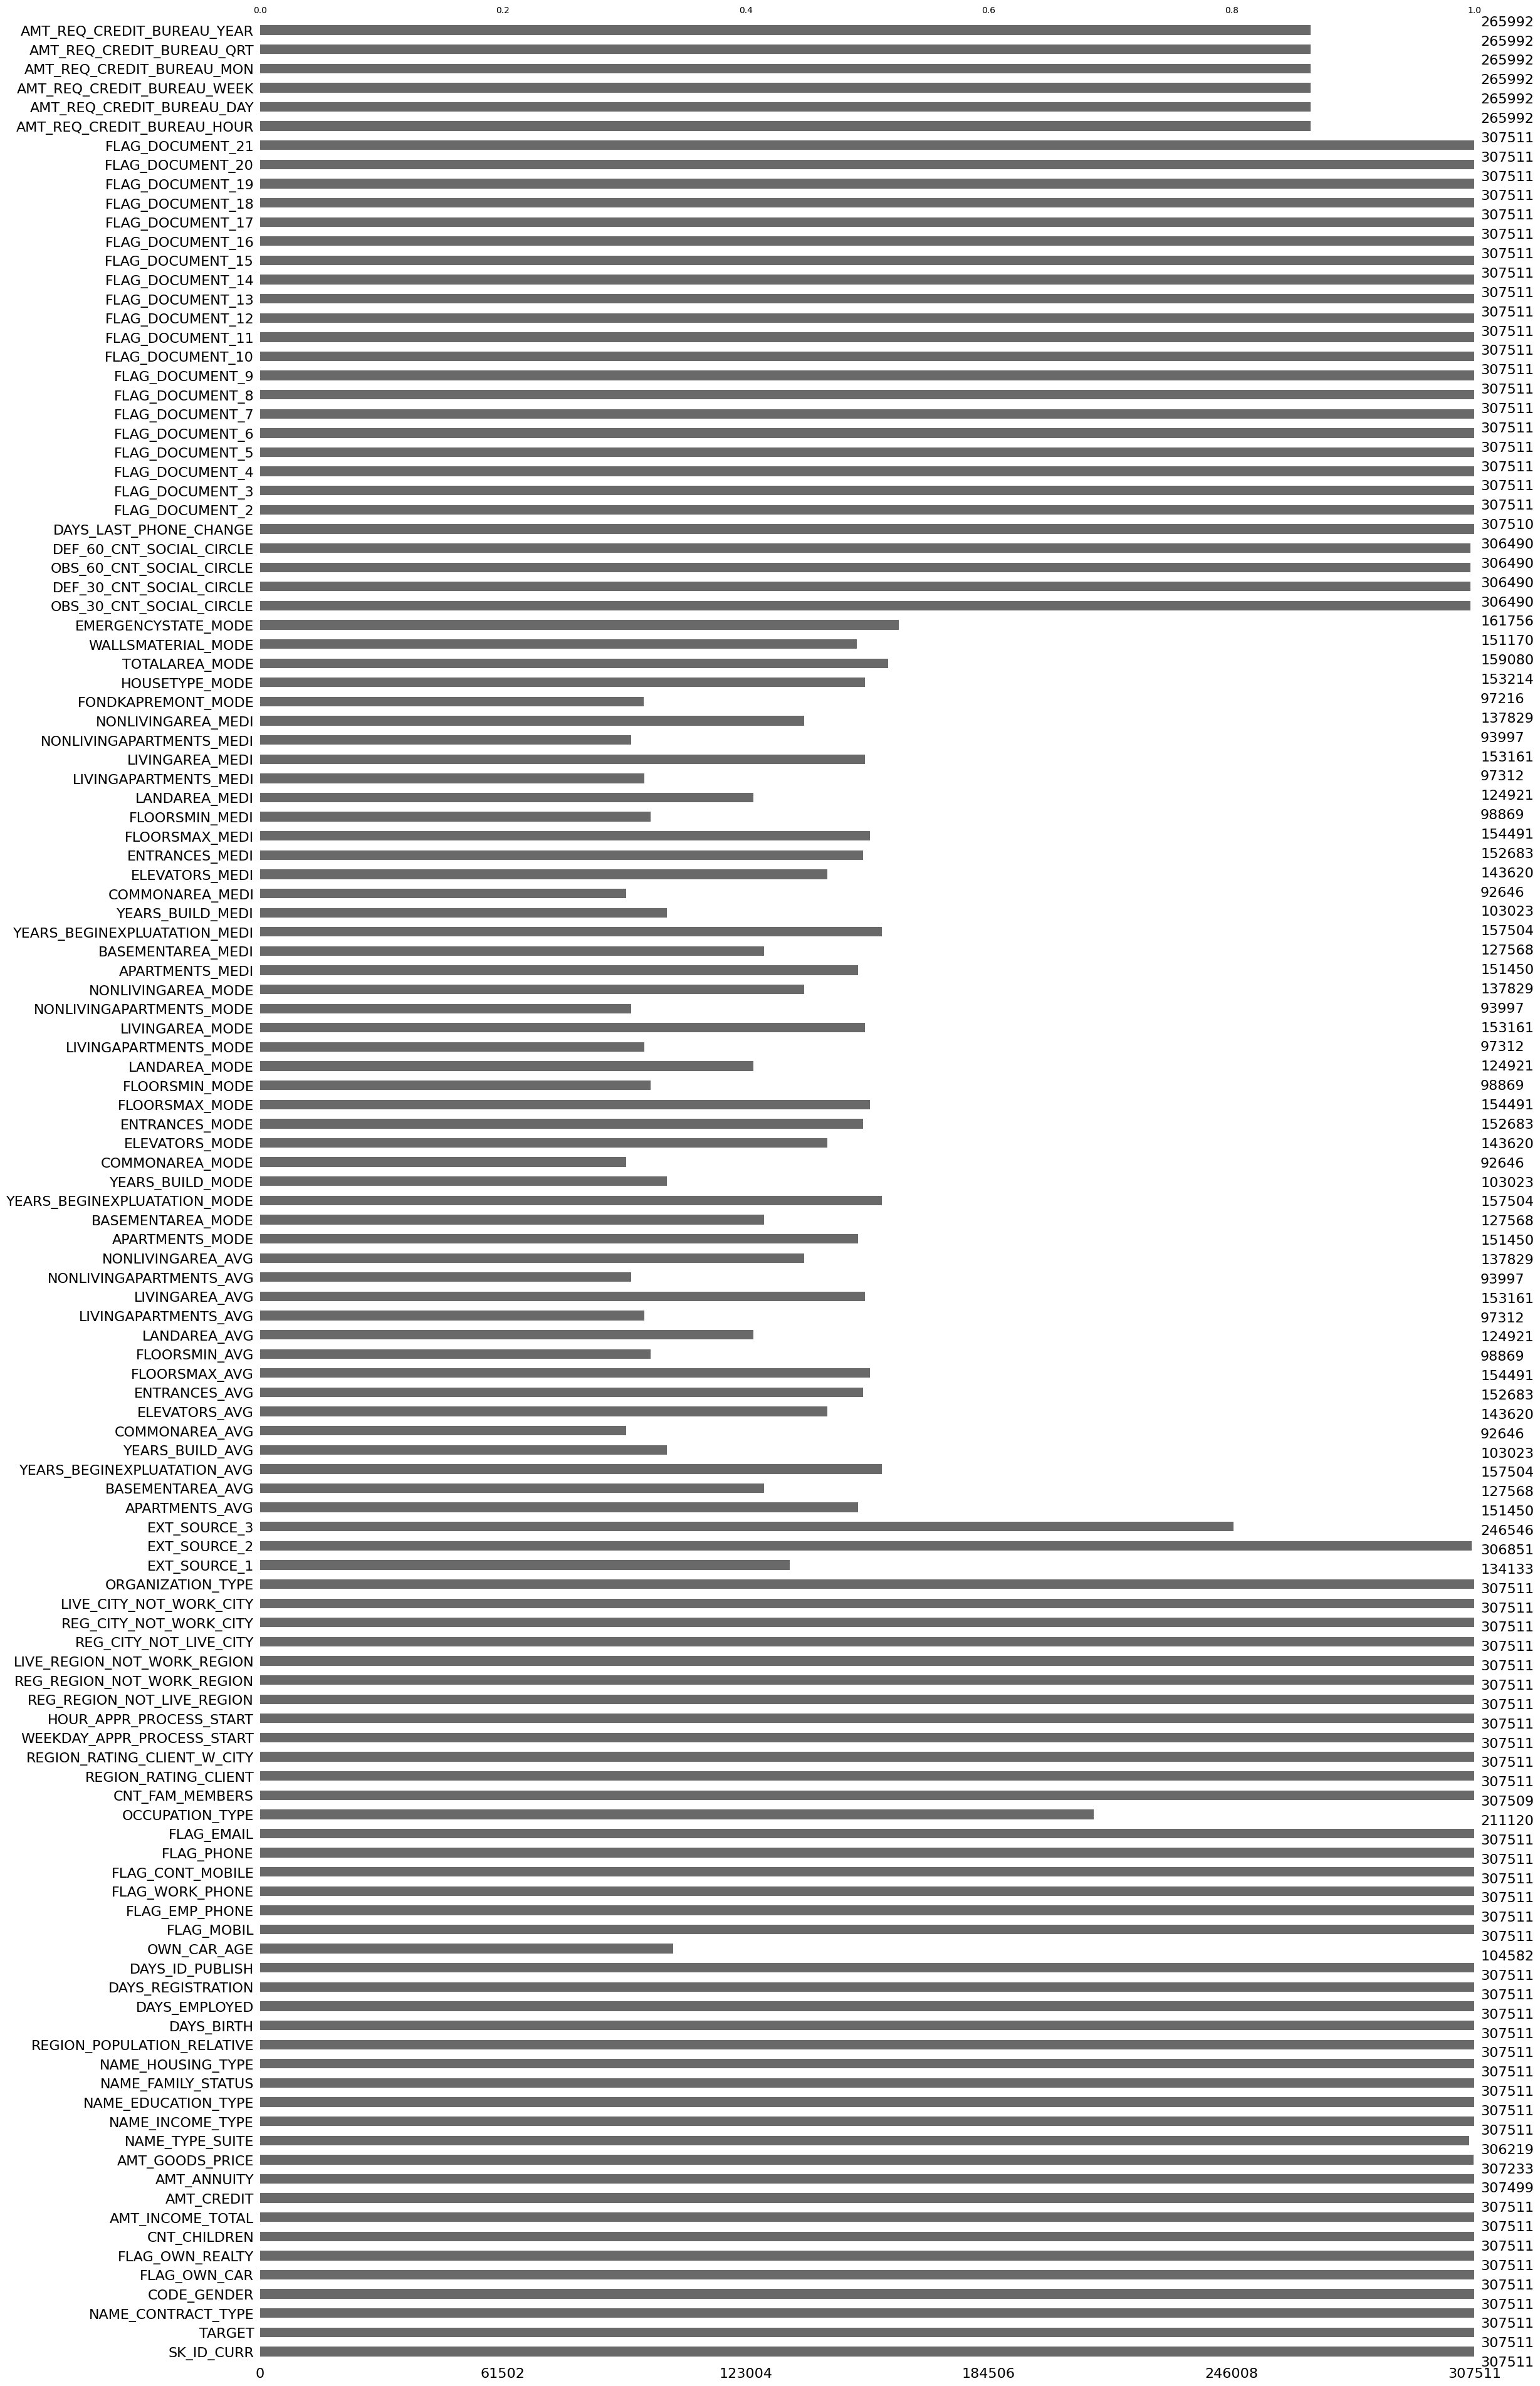

In [7]:
import missingno as mn

mn.bar(application_df);

Note: lots of missing values
Next: Check what percent of each column is null values

In [8]:
# % null value in each column
round(application_df.isnull().sum() / application_df.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

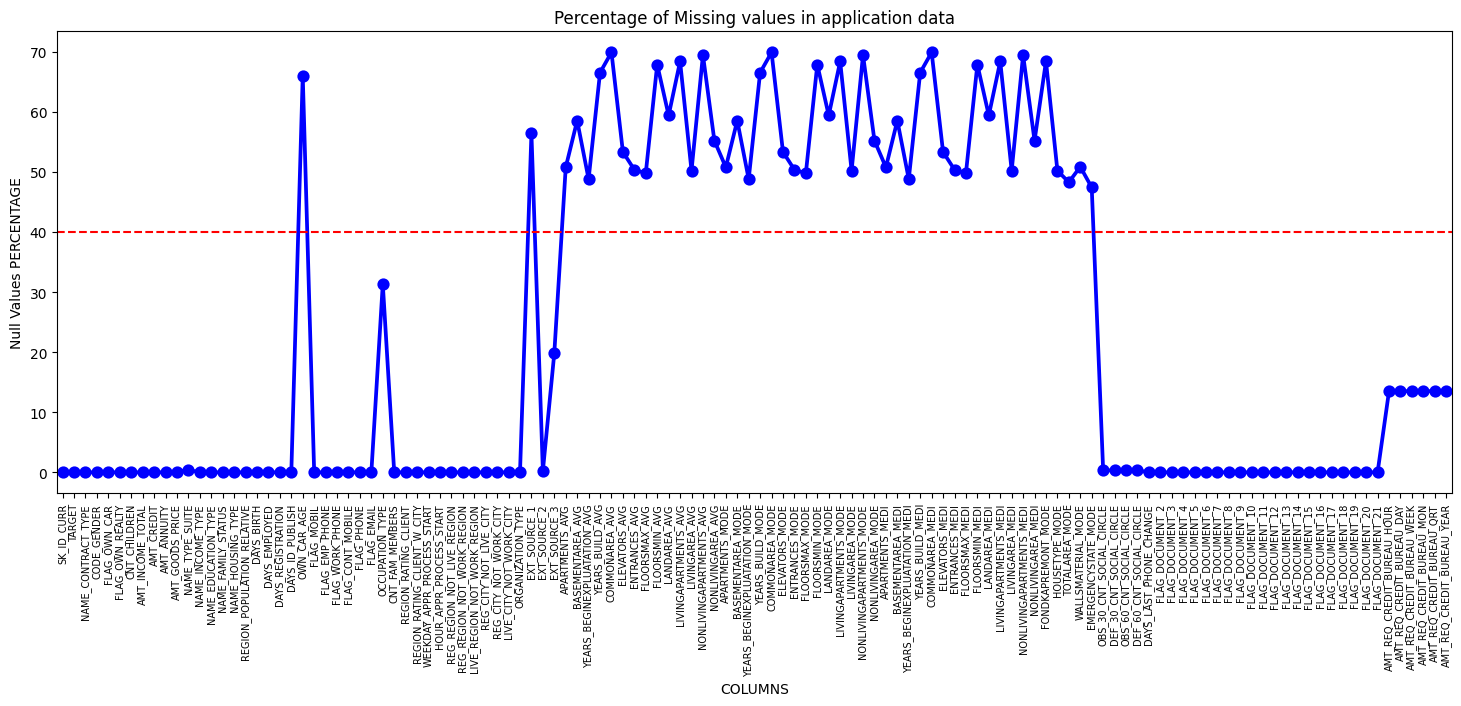

In [9]:
# Plotting the columns vs missing values percentage with 40% being the cut-off marks

null_application_df = pd.DataFrame((application_df.isnull().sum())*100/application_df.shape[0]).reset_index()
null_application_df.columns = ['Column Name', 'Null Values Percentage']


fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",
                   y="Null Values Percentage",
                   data=null_application_df,
                   color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [10]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_application_df[null_application_df["Null Values Percentage"]>=40]
nullcol_40_application

Column Name  Null Values Percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MODE               50.749729
59             BASEMENTAREA_MODE               58.515956
60  YEARS_BEGINEXPLUATATION_MODE               48.781019
61              YEARS_BUILD_MODE               66.497784
62               COMMONAREA_MODE               69.872297
63                ELEVATORS_MODE               53.295980
64                ENTRANCES_MODE               50.348768
65                FLOORSMAX_MODE               49.760822
66                FLOORSMIN_MODE               67.848630
67                 LANDAREA_MODE               59.376738
68         LIVINGAPARTMENTS_MODE               68.354953
69               LIVINGAREA_MODE               50.193326
70      NONLIVINGAPARTMENTS_MODE               69.432963
71            NONLIVINGAREA_MODE               55.179164
72               APARTMENTS_MEDI               50.749729
73             BASEMENTAREA_MEDI               58.515956
74  YEARS_BEGINEXPLUATATION_MEDI               48.781019
75              YEARS_BUILD_MEDI               66.497784
76               COMMONAREA_MEDI               69.872297
77                ELEVATORS_MEDI               53.295980
78                ENTRANCES_MEDI               50.348768
79                FLOORSMAX_MEDI               49.760822
80                FLOORSMIN_MEDI               67.848630
81                 LANDAREA_MEDI               59.376738
82         LIVINGAPARTMENTS_MEDI               68.354953
83               LIVINGAREA_MEDI               50.193326
84      NONLIVINGAPARTMENTS_MEDI               69.432963
85            NONLIVINGAREA_MEDI               55.179164
86            FONDKAPREMONT_MODE               68.386172
87                HOUSETYPE_MODE               50.176091
88                TOTALAREA_MODE               48.268517
89            WALLSMATERIAL_MODE               50.840783
90           EMERGENCYSTATE_MODE               47.398304

In [11]:
len(nullcol_40_application)

49

## Analyzing and Deleting Unnecessary Columns

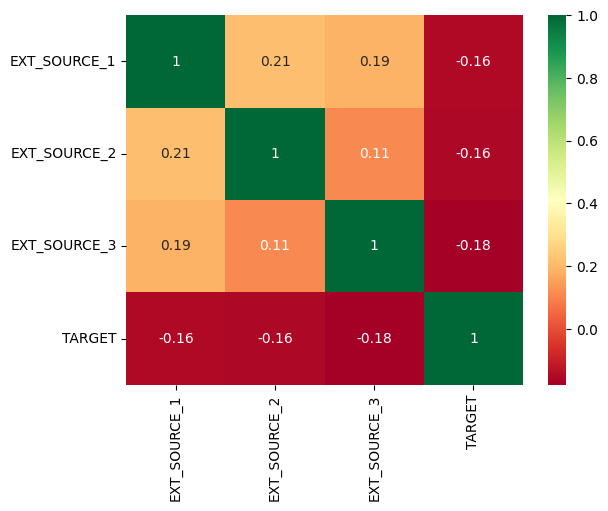

In [12]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = application_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

The heatmap shows that there is almost no correlation between EXT_SOURCE_X and and the target column, so we can drop these rows

In [13]:
# creating a list of columns that need to be dropped including columns with >40% null values

Unwanted_application = nullcol_40_application["Column Name"].tolist()
# Unwanted_application += ['EXT_SOURCE_2','EXT_SOURCE_3']
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

49

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\3299188982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})


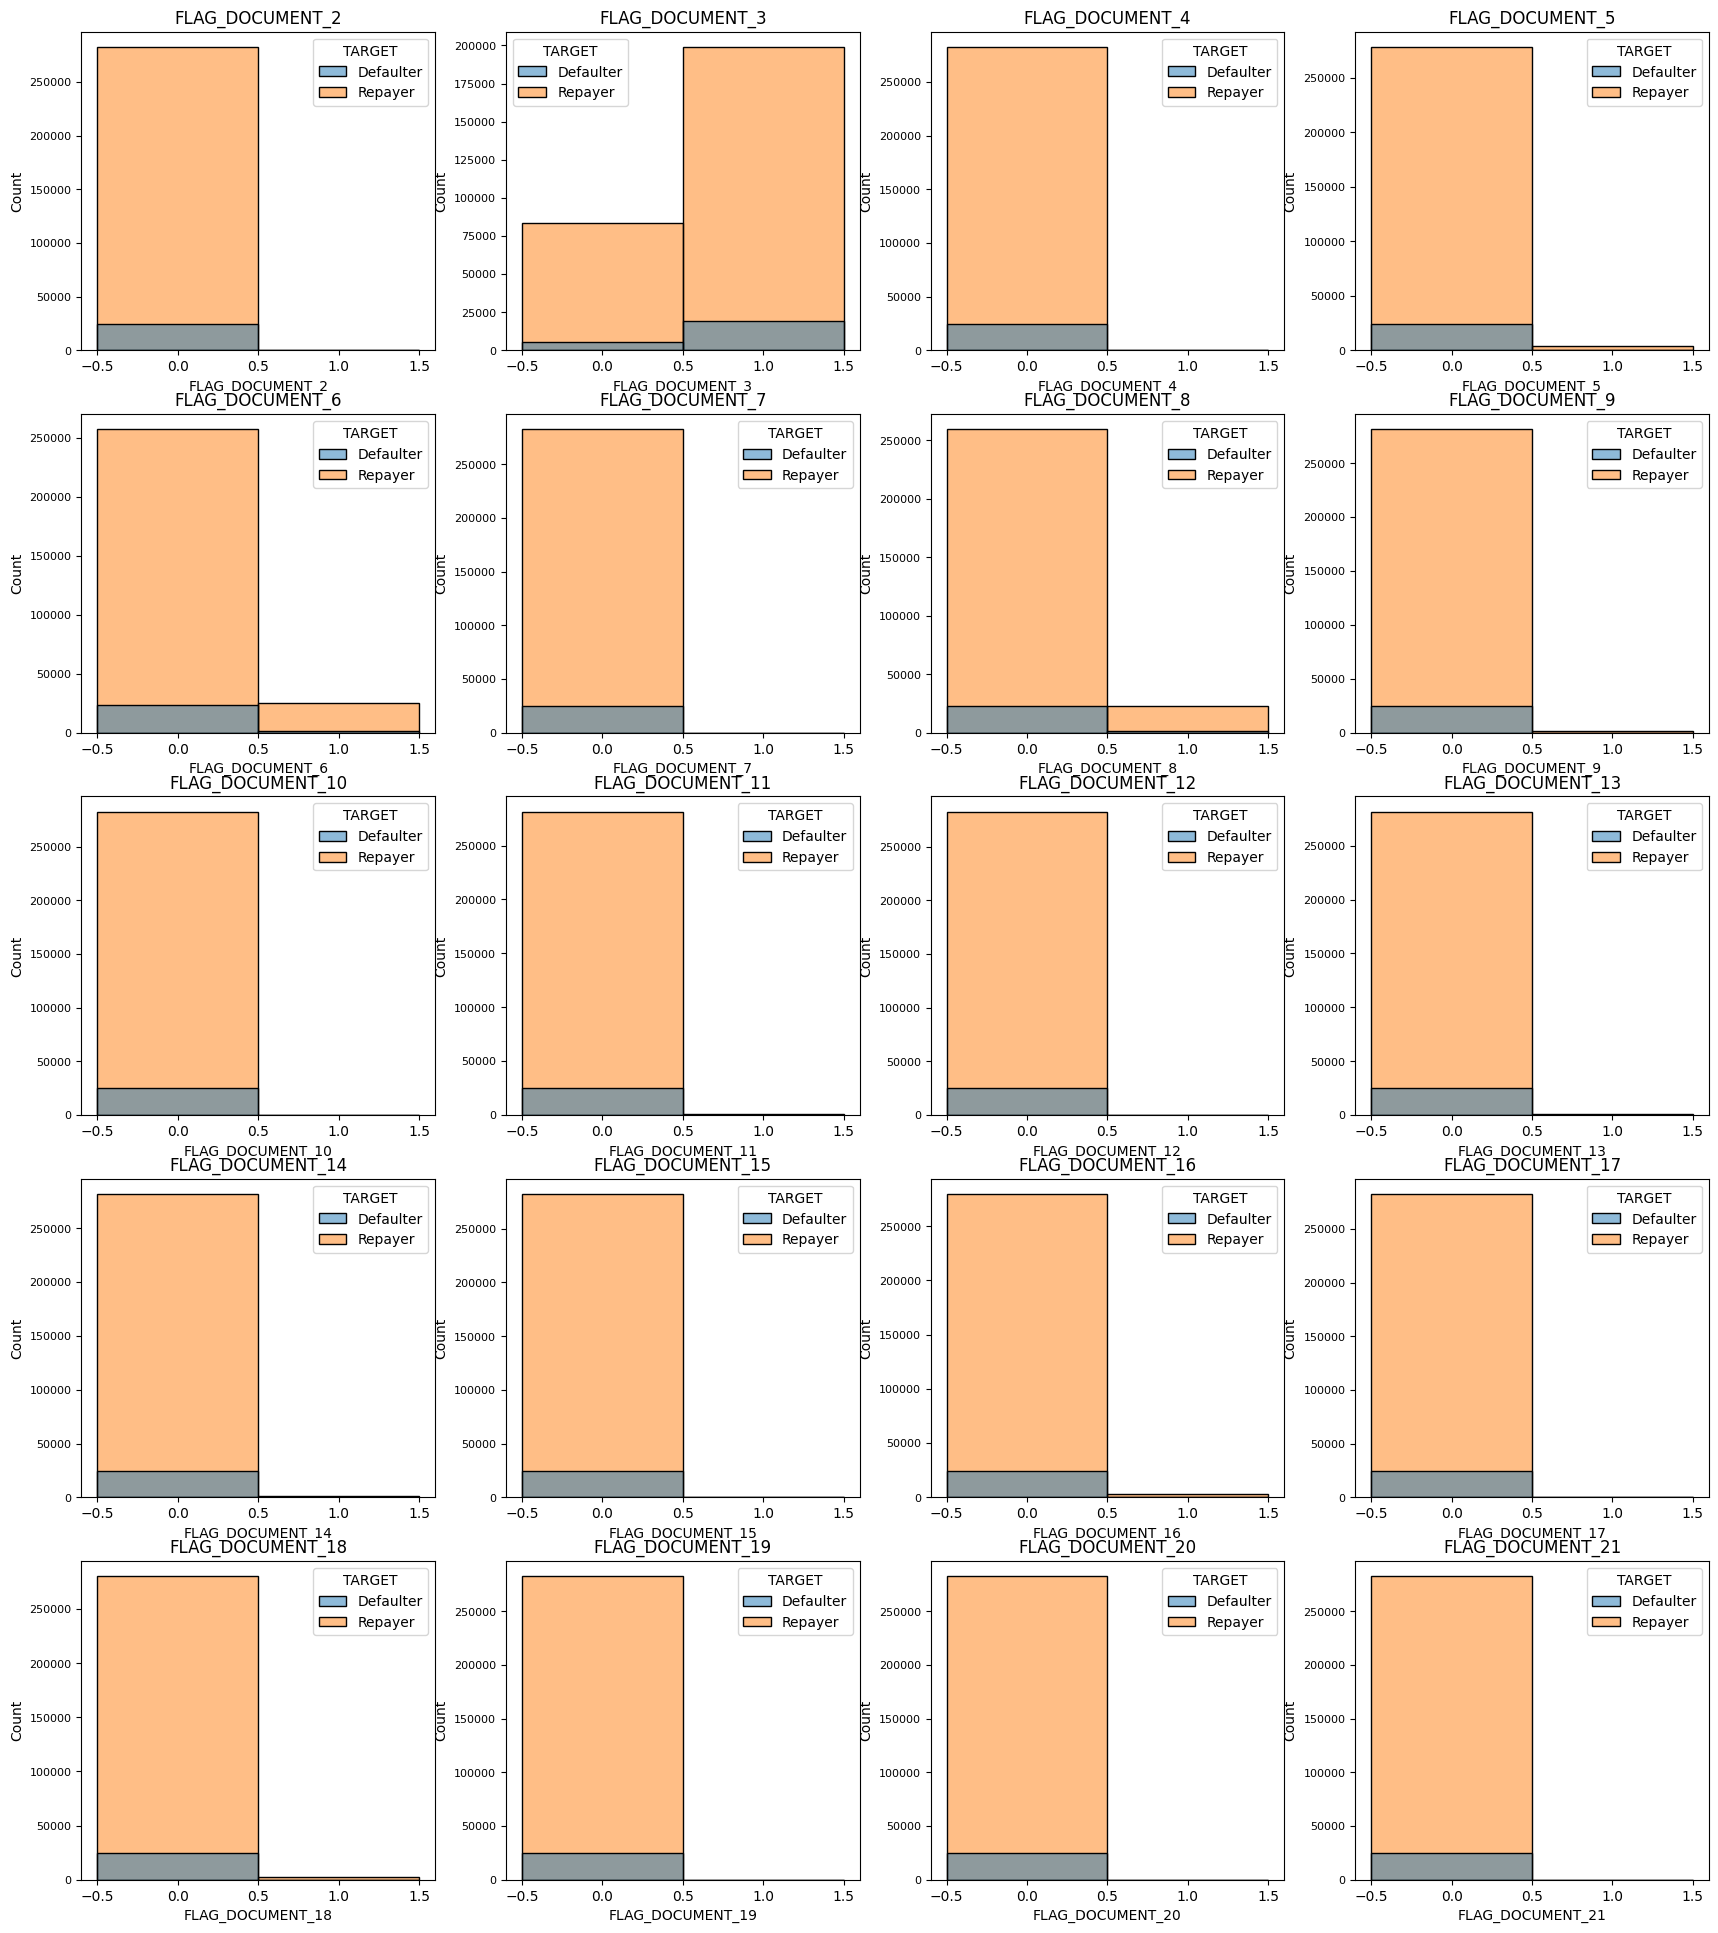

In [14]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = application_df[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.histplot(data=df_flag, x=df_flag[i], hue='TARGET', bins=2, discrete=True)
    plt.yticks(fontsize=8)
    plt.title(i)

The above graphs show that for most loan applications. clients did not submit any documents except for FLAG_DOCUMENT_3. We can delete the other columns, but keep FLAG_DOCUMENT_3. The data suggests that if a client submits FLAG_DOCUMENT_3 it lessens the chance they default because there is a higher number of repayers that submitted the document than those who did not. 

In [15]:
# Including the flag documents for dropping the Document columns

col_Doc.remove('FLAG_DOCUMENT_3')
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

68

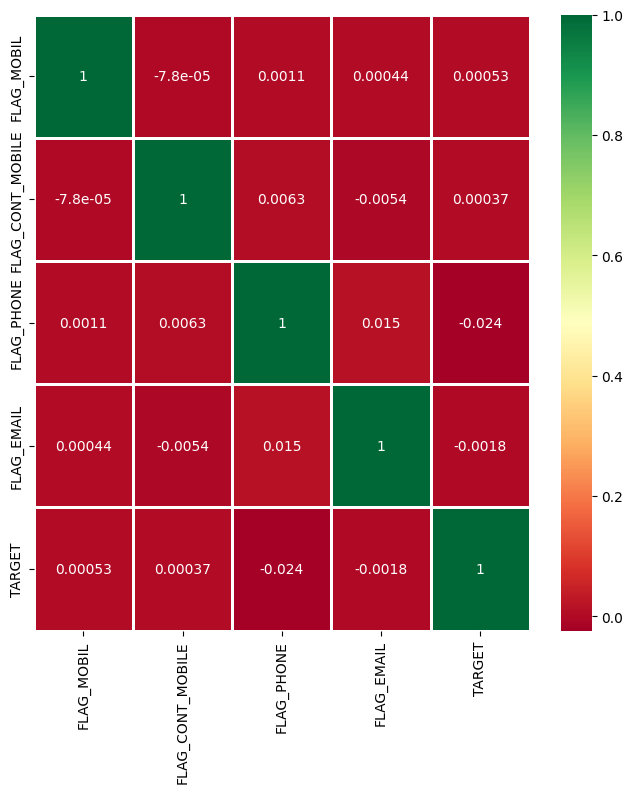

In [16]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 
              #  'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
               'FLAG_CONT_MOBILE',
              'FLAG_PHONE', 
              'FLAG_EMAIL',
              'TARGET']
Contact_corr = application_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

There is no correlation between flags of mobile phone, email, etc with loan repayment; thus these columns can be deleted

In [17]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

72

We are going to remove 76 columns from the dataframe

In [18]:
application_df.drop(labels=Unwanted_application, axis=1, inplace=True)

In [19]:
df_dropped = application_df

In [20]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [21]:
null_counts = df_dropped.isnull().sum()
print(null_counts)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
W

In [22]:
df_dropped

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120               1                0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1           100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291               1                0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2           100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531               1                1        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.0                       0.0                       0.0                       0.0           

## Standardizing Values

- Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.
- Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns
- Categorize the amount variables into bins
- Convert region rating column and few other columns to categorical

In [23]:
# changing columns that have negative values to positive
date_col = ['DAYS_EMPLOYED','DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

for col in date_col:
    df_dropped[col] = abs(df_dropped[col])

In [24]:
# binning numerical columns to create categorical column

# bins for income amount

df_dropped['AMT_INCOME_TOTAL'] = df_dropped['AMT_INCOME_TOTAL'] / 100000

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1200]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df_dropped['AMT_INCOME_RANGE'] = pd.cut(df_dropped['AMT_INCOME_TOTAL'], bins, labels=slot)

In [25]:
df_dropped['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100K-200K    50.696723
200k-300k    21.194689
0-100K       20.714056
300k-400k     4.772512
400k-500k     1.743352
500k-600k     0.356085
600k-700k     0.282592
800k-900k     0.096907
1M Above      0.081298
700k-800k     0.052681
900k-1M       0.009105
Name: proportion, dtype: float64

In [26]:
# bins for credit amount

df_dropped['AMT_CREDIT'] = df_dropped['AMT_CREDIT'] / 100000

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df_dropped['AMT_CREDIT_RANGE'] = pd.cut(df_dropped['AMT_CREDIT'], bins, labels=slot)

In [27]:
df_dropped['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

In [28]:
# creating bins for age

df_dropped['AGE'] = df_dropped['DAYS_BIRTH'] // 365
bins = [0, 20, 30, 40, 50, 100]
slots = ['0-20','20-30','30-40','40-50','50 above']

df_dropped['AGE_GROUP']=pd.cut(df_dropped['AGE'],bins=bins,labels=slots)

In [29]:
df_dropped['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

In [30]:
# Creating bins for Employement Time

df_dropped['YEARS_EMPLOYED'] = df_dropped['DAYS_EMPLOYED'] / 365
bins = [0, 5, 10, 20, 30, 40, 50, 60, 150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

df_dropped['EMPLOYMENT_YEAR'] = pd.cut(df_dropped['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [31]:
#checking the binning of data and % of data in each category
df_dropped['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         54.061911
5-10        25.729074
10-20       15.229143
20-30        3.788050
30-40        1.099014
40-50        0.092807
50-60        0.000000
60 above     0.000000
Name: proportion, dtype: float64

In [32]:
#Checking the number of unique values each column possess to identify categorical columns
df_dropped.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_REALTY                     2
FLAG_OWN_CAR                        2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_3                     2
CODE_GENDER                         3
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
AGE_GROUP                           5
EMPLOYMENT_YEAR                     6
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CRED

In [33]:
# checking columns to see if they are in correct data type using the nunique values from above
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [34]:
# found 4 random XNA values in gender column
df_dropped = df_dropped[df_dropped['CODE_GENDER'] != 'XNA']

In [35]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'] # not including OCCUPATION_TYPE as we are imputing with specificity later
for col in categorical_columns:
    df_dropped[col] =pd.Categorical(df_dropped[col])

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\3038421177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[col] =pd.Categorical(df_dropped[col])
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\3038421177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[col] =pd.Categorical(df_dropped[col])
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\3038421177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [36]:
# checking if conversion worked
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307507 non-null  int64   
 1   TARGET                       307507 non-null  int64   
 2   NAME_CONTRACT_TYPE           307507 non-null  category
 3   CODE_GENDER                  307507 non-null  category
 4   FLAG_OWN_CAR                 307507 non-null  category
 5   FLAG_OWN_REALTY              307507 non-null  category
 6   CNT_CHILDREN                 307507 non-null  int64   
 7   AMT_INCOME_TOTAL             307507 non-null  float64 
 8   AMT_CREDIT                   307507 non-null  float64 
 9   AMT_ANNUITY                  307495 non-null  float64 
 10  AMT_GOODS_PRICE              307229 non-null  float64 
 11  NAME_TYPE_SUITE              306215 non-null  category
 12  NAME_INCOME_TYPE             307507 non-null  cat

## Null Value Data Imputation

Strategy for applicationDF:
- To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.
- To impute null values in categorical variables which has higher null percentage, a new category is created.
- To impute null values in numerical variables which has lower null percentage, median() is used as
- There are no outliers in the columns
- Mean returned decimal values and median returned whole numbers and the columns were number of requests

In [37]:
# checking the null value % of each column in applicationDF dataframe
round(df_dropped.isnull().sum() / df_dropped.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
W

In [38]:
# Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:
df_dropped['NAME_TYPE_SUITE'].describe()

count            306215
unique                7
top       Unaccompanied
freq             248523
Name: NAME_TYPE_SUITE, dtype: object

In [39]:
df_dropped['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: category
Categories (7, object): ['Children', 'Family', 'Group of people', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied']

In [40]:
# filling in null values for NAME_TYPE_SUITE

# df_dropped['NAME_TYPE_SUITE'] = df_dropped['NAME_TYPE_SUITE'].fillna((df_dropped['NAME_TYPE_SUITE'].mode()[0]))

# not doing this because it causes data leakage for the modeling

In [41]:
# Fill in data on Pensioners
null_in_col2 = df_dropped[df_dropped['OCCUPATION_TYPE'].isna()]
col1_distribution = null_in_col2['NAME_INCOME_TYPE'].value_counts(dropna=False)  # includes nulls in Occupation Type if present
print("When Occulation Type is null, Income Type contains:")
print(col1_distribution)

count = (df_dropped['NAME_INCOME_TYPE'] == 'Pensioner').sum()
print(count)

pensioners_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'Pensioner']
occupation_distribution = pensioners_data['OCCUPATION_TYPE'].value_counts(dropna=False)  # Includes NaN if present

print("Distribution of Occupation Type values for 'pensioners' in Income Type:")
print(occupation_distribution)

worker_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'Working']
occupation_distribution = worker_data['OCCUPATION_TYPE'].value_counts(dropna=False)  # Includes NaN if present

print("Distribution of Occupation Type values for 'Working' in Income Type:")
print(occupation_distribution)

commercial_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'Commercial associate']
occupation_distribution_distribution = commercial_data['OCCUPATION_TYPE'].value_counts(dropna=False)  # Includes NaN if present

print("Distribution of Occupation Type values for 'Commercial Associate' in Income Type:")
print(occupation_distribution)

state_servant_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'State servant']
occupation_distribution = state_servant_data['OCCUPATION_TYPE'].value_counts(dropna=False)  

print("Distribution of Occupation Type values for 'State servant' in Income Type:")
print(occupation_distribution)

df_dropped.loc[(df_dropped['NAME_INCOME_TYPE'] == 'Pensioner') & (df_dropped['OCCUPATION_TYPE'].isna()), 'OCCUPATION_TYPE'] = 'Retiree'

df_dropped.loc[(df_dropped['NAME_INCOME_TYPE'] == 'Unemployed') & (df_dropped['OCCUPATION_TYPE'].isna()), 'OCCUPATION_TYPE'] = 'Unemployed'
nullcount = df_dropped['OCCUPATION_TYPE'].isnull().sum()
print(nullcount)

df_dropped['OCCUPATION_TYPE'] = pd.Categorical(df_dropped['OCCUPATION_TYPE'])

When Occulation Type is null, Income Type contains:
NAME_INCOME_TYPE
Pensioner               55357
Working                 24919
Commercial associate    12296
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: count, dtype: int64
55362
Distribution of Occupation Type values for 'pensioners' in Income Type:
OCCUPATION_TYPE
NaN               55357
Cleaning staff        2
Laborers              1
Medicine staff        1
Sales staff           1
Name: count, dtype: int64
Distribution of Occupation Type values for 'Working' in Income Type:
OCCUPATION_TYPE
Laborers                 40548
NaN                      24919
Sales staff              20811
Core staff               14079
Drivers                  12871
Managers                 10306
High skill tech staff     6852
Accountants               5112
Medicine staff            4915
Security staff            4782
Cooking staff             4188

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\4140496162.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['OCCUPATION_TYPE'] = pd.Categorical(df_dropped['OCCUPATION_TYPE'])


In [42]:
# Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:
df_dropped['OCCUPATION_TYPE'] = df_dropped['OCCUPATION_TYPE'].cat.add_categories('Unknown')
df_dropped['OCCUPATION_TYPE']= df_dropped['OCCUPATION_TYPE'].fillna('Unknown')

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\360430165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['OCCUPATION_TYPE'] = df_dropped['OCCUPATION_TYPE'].cat.add_categories('Unknown')
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\360430165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['OCCUPATION_TYPE']= df_dropped['OCCUPATION_TYPE'].fillna('Unknown')


In [43]:
df_dropped['CODE_GENDER']

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307507, dtype: category
Categories (2, object): ['F', 'M']

In [44]:
# Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:
df_dropped[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               265988.000000              265988.000000               265988.000000              265988.000000              265988.000000               265988.000000
mean                     0.006403                   0.007000                    0.034362                   0.267388                   0.265474                    1.899950
std                      0.083850                   0.110758                    0.204686                   0.915994                   0.794060                    1.869286
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

In [45]:
# filling in null values for AMT_REQ_CREDIT_X
# amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
#          'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

# for col in amount:
#     df_dropped[col] = df_dropped[col].fillna(df_dropped[col].median())

# not doing this because it causes data leakage for the modeling

In [46]:
# checking the null value % of each column in df_dropped dataframe
round(df_dropped.isnull().sum() / df_dropped.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
W

In [47]:
# there is a small amount of null values in these columns, so we will impute the median
# low_percent_na_num = ['AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# for col in low_percent_na_num:
#     df_dropped[col] = df_dropped[col].fillna(df_dropped[col].median())

# not doing this because it causes data leakage for the modeling

In [48]:
# checking the null value % of each column in df_dropped dataframe
round(df_dropped.isnull().sum() / df_dropped.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
W

In [49]:
# # In days employed we have values of 365243, which could mean that the person is not employed, so we will replace this with 0
# # First we need to check the distribution of the values in the column 
# result = df_dropped.loc[df_dropped['DAYS_EMPLOYED'] == 365243, 'NAME_INCOME_TYPE'].value_counts() 

# print(result)

# result = df_dropped.loc[df_dropped['DAYS_EMPLOYED'] == 365243, 'OCCUPATION_TYPE'].value_counts() 


# print(result)

# # Value counts for DAYS_EMPLOYED column matches up with the income type and occupation type of pensioners and unemployeds, so we can replace the value with 0

# print(df_dropped['DAYS_EMPLOYED'].value_counts())

# df_dropped.loc[df_dropped['DAYS_EMPLOYED'] ==  365243, 'DAYS_EMPLOYED'] = 0

# print(df_dropped['NAME_INCOME_TYPE'].value_counts())

In [50]:
# creating new category for employment_year
# there are some rows that have 365243 as the value for days employed, which is 1000 year
# we are going to assume this means unemployed

df_dropped['EMPLOYMENT_YEAR'] = df_dropped['EMPLOYMENT_YEAR'].cat.add_categories('Unknown')
df_dropped['EMPLOYMENT_YEAR']= df_dropped['EMPLOYMENT_YEAR'].fillna('Unknown')

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\3867615511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['EMPLOYMENT_YEAR'] = df_dropped['EMPLOYMENT_YEAR'].cat.add_categories('Unknown')
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\3867615511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['EMPLOYMENT_YEAR']= df_dropped['EMPLOYMENT_YEAR'].fillna('Unknown')


In [51]:
# checking the null value % of each column in df_dropped dataframe
round(df_dropped.isnull().sum() / df_dropped.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
W

## Finding Outliers

In [52]:
# creating a temporary numerical-only dataframe
df_numerical = df_dropped.select_dtypes(include=['int64', 'float64'])

In [53]:
# looking for non-continous columns
df_numerical.nunique().sort_values()

TARGET                             2
FLAG_WORK_PHONE                    2
FLAG_EMP_PHONE                     2
REG_REGION_NOT_LIVE_REGION         2
FLAG_DOCUMENT_3                    2
AMT_REQ_CREDIT_BUREAU_HOUR         5
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AGE                               50
REGION_POPULATION_RELATIVE        81
EXT_SOURCE_3                     814
AMT_GOODS_PRICE                 1002
AMT_INCOME_TOTAL                2548
DAYS_LAST_PHONE_CHANGE          3773
AMT_CREDIT                      5603
DAYS_ID_PUBLISH                 6168
DAYS_EMPLOYED                  12574
Y

In [54]:
# creating a list of all numerical columns
numerical_col_list = df_dropped.select_dtypes(include=['int64', 'float64']).columns.to_list()

binary_col = ['REG_REGION_NOT_LIVE_REGION', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_3', 'FLAG_EMP_PHONE', 'TARGET', 'SK_ID_CURR']
# removing non-continous columns
for col in binary_col:
    numerical_col_list.remove(col)

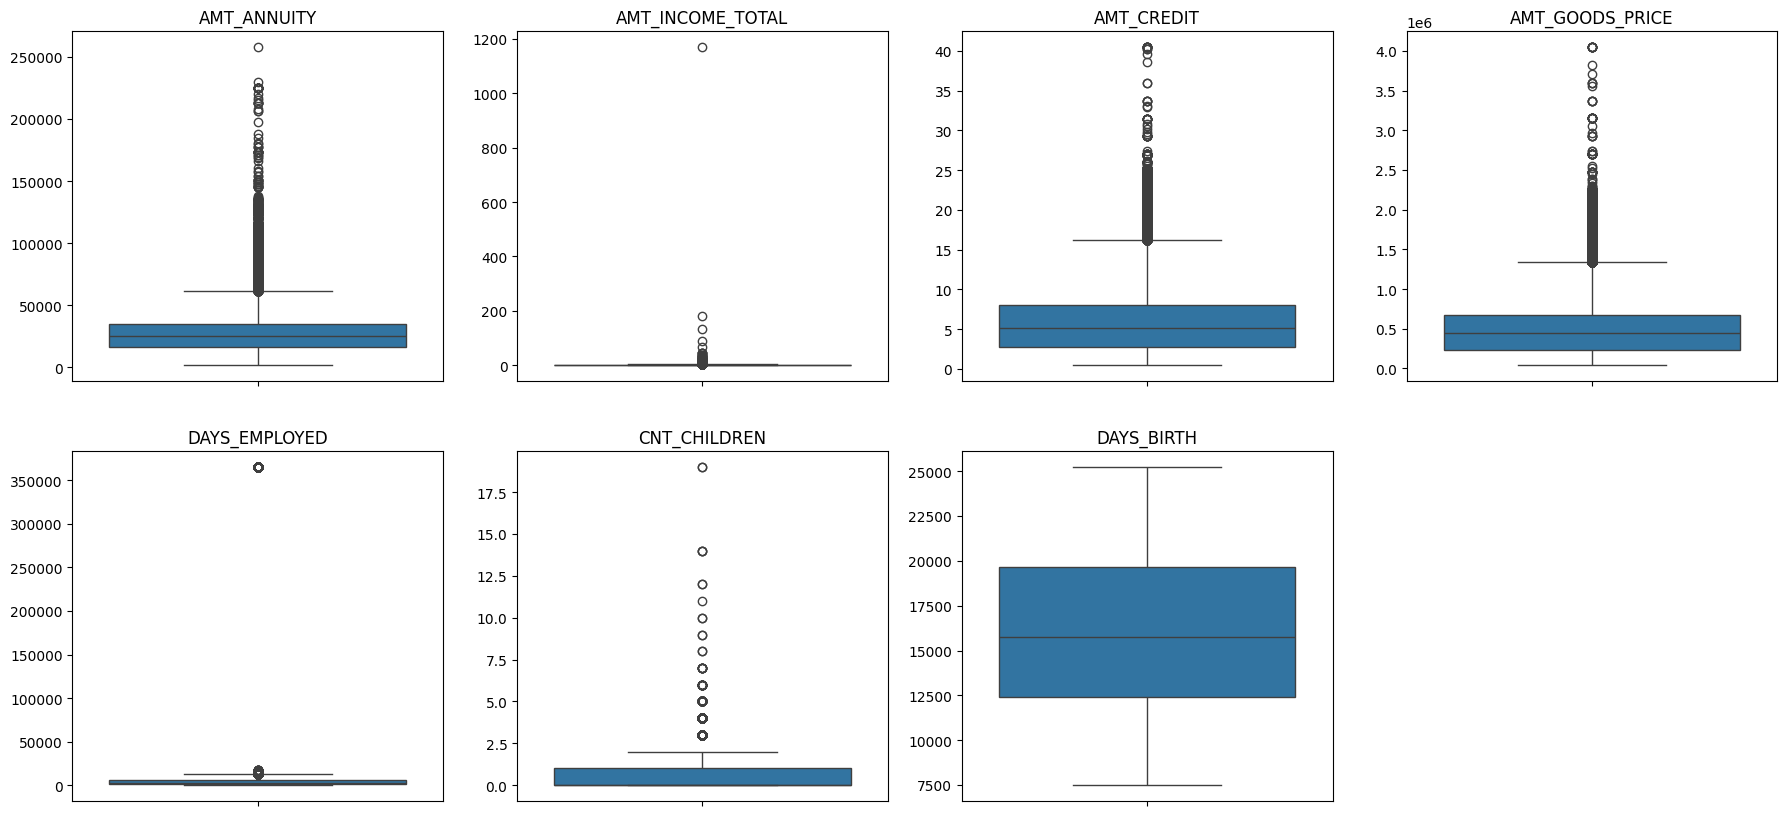

In [55]:
# using boxplots to visualize outliers

plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df_dropped[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df_dropped[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [56]:
# quantifying outliers for each numerical column
for column in numerical_col_list:
    Q1 = df_dropped[column].quantile(0.25)
    Q3 = df_dropped[column].quantile(0.75)
    IQR = Q3 - Q1 
    median = df_dropped[column].median()
    outlier_threshold = median + 1.5*IQR
    num_outliers = df_dropped[df_dropped[column] > outlier_threshold].count()[column]
    print(f"Number of outliers, {column}: {num_outliers}")

Number of outliers, CNT_CHILDREN: 31020
Number of outliers, AMT_INCOME_TOTAL: 26745
Number of outliers, AMT_CREDIT: 17525
Number of outliers, AMT_ANNUITY: 17652
Number of outliers, AMT_GOODS_PRICE: 30224
Number of outliers, REGION_POPULATION_RELATIVE: 8412
Number of outliers, DAYS_BIRTH: 0
Number of outliers, DAYS_EMPLOYED: 61052
Number of outliers, DAYS_REGISTRATION: 7498
Number of outliers, DAYS_ID_PUBLISH: 1
Number of outliers, CNT_FAM_MEMBERS: 28703
Number of outliers, HOUR_APPR_PROCESS_START: 5640
Number of outliers, EXT_SOURCE_2: 0
Number of outliers, EXT_SOURCE_3: 0
Number of outliers, OBS_30_CNT_SOCIAL_CIRCLE: 43665
Number of outliers, DEF_30_CNT_SOCIAL_CIRCLE: 35164
Number of outliers, OBS_60_CNT_SOCIAL_CIRCLE: 42971
Number of outliers, DEF_60_CNT_SOCIAL_CIRCLE: 25767
Number of outliers, DAYS_LAST_PHONE_CHANGE: 9647
Number of outliers, AMT_REQ_CREDIT_BUREAU_HOUR: 1626
Number of outliers, AMT_REQ_CREDIT_BUREAU_DAY: 1489
Number of outliers, AMT_REQ_CREDIT_BUREAU_WEEK: 8536
Numbe

In [57]:
df_dropped[numerical_col_list].describe()

CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  YEARS_EMPLOYED
count  307507.000000     307507.000000  307507.000000  307495.000000     3.072290e+05               307507.000000  307507.000000  307507.000000      307507.000000    307507.000000    307505.000000            307507.000000  3.068470e+05  246542.000000             306486.000000             306486.000000             306486.000000             306486.000000           307506.000000               265988.000000              265988.000000               265988.000000              265988.000000              265988.000000               265988.000000  307507.000000   307507.000000
mean        0.417047          1.687977       5.990286   27108.666786     5.383977e+05                    0.020868   16037.027271   67725.569893        4986.131376      2994.201670         2.152658                12.063394  5.143918e-01       0.510856                  1.422209                  0.143406                  1.405255                  0.100034              962.860546                    0.006403                   0.007000                    0.034362                   0.267388                   0.265474                    1.899950      43.436055      185.549507
std         0.722119          2.371246       4.024926   14493.798379     3.694472e+05                    0.013831    4363.982424  139444.469301        3522.883030      1509.454566         0.910680                 3.265835  1.910603e-01       0.194843                  2.400931                  0.446644                  2.379744                  0.362221              826.811491                    0.083850                   0.110758                    0.204686                   0.915994                   0.794060                    1.869286      11.954577      382.039642
min         0.000000          0.256500       0.450000    1615.500000     4.050000e+04                    0.000290    7489.000000       0.000000           0.000000         0.000000         1.000000                 0.000000  8.173617e-08       0.000527                  0.000000                  0.000000                  0.000000                  0.000000                0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000      20.000000        0.000000
25%         0.000000          1.125000       2.700000   16524.000000     2.385000e+05                    0.010006   12413.000000     933.000000        2010.000000      1720.000000         2.000000                10.000000  3.924574e-01       0.370650                  0.000000                  0.000000                  0.000000                  0.000000              274.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000      34.000000        2.556164
50%         0.000000          1.471500       5.135310   24903.000000     4.500000e+05                    0.018850   15750.000000    2219.000000        4504.000000      3254.000000         2.000000                12.000000  5.659614e-01       0.535276                  0.000000                  0.000000                  0.000000                  0.000000              757.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000      43.000000

## Visualization (from kaggle notebook)

Strategy:
 - The data analysis flow has been planned in following way:

- Imbalance in Data
- Categorical Data Analysis
    - Categorical segmented Univariate Analysis
    - Categorical Bi/Multivariate analysis
- Numeric Data Analysis
    - Bi-furcation of databased based on TARGET data
    - Correlation Matrix
    - Numerical segmented Univariate Analysis
    - Numerical Bi/Multivariate analysis

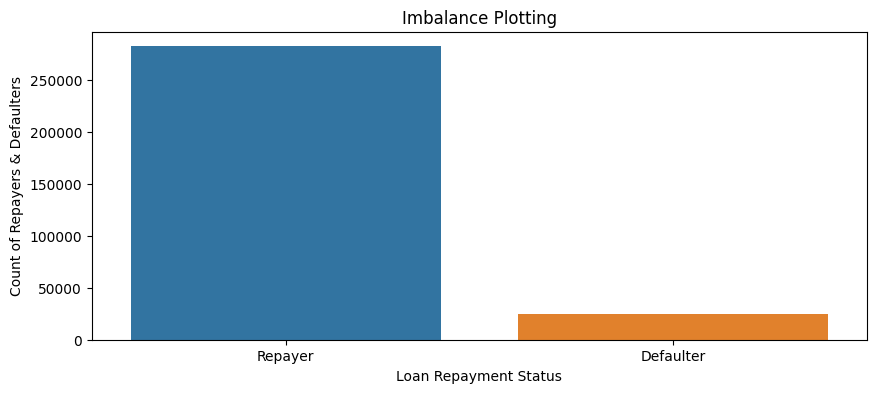

In [58]:
Imbalance = df_dropped["TARGET"].value_counts().reset_index()
Imbalance['TARGET'] = np.where(Imbalance['TARGET'] == 1, "Defaulter", "Repayer")

plt.figure(figsize=(10,4))
sns.barplot(x=Imbalance['TARGET'],
            y=Imbalance['count'],
            hue=Imbalance['TARGET'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

Plotting Functions

In [59]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = df_dropped[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_dropped[[feature, 'TARGET']].groupby([feature],as_index=False, observed=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df_dropped,
                    hue=df_dropped["TARGET"],
                    order=cat_perc[feature])
    
    for i in range(len(s.containers)):
        s.bar_label(s.containers[i], fontsize=10)

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x=feature, 
                    y=cat_perc['TARGET'], 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    hue=feature,
                    palette='pastel')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    for i in range(len(s.containers)):
        s.bar_label(s.containers[i], fontsize=10)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [60]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [61]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, kind, legend, figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=data, 
                hue=x,
                kind=kind,
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

Categorical Analysis

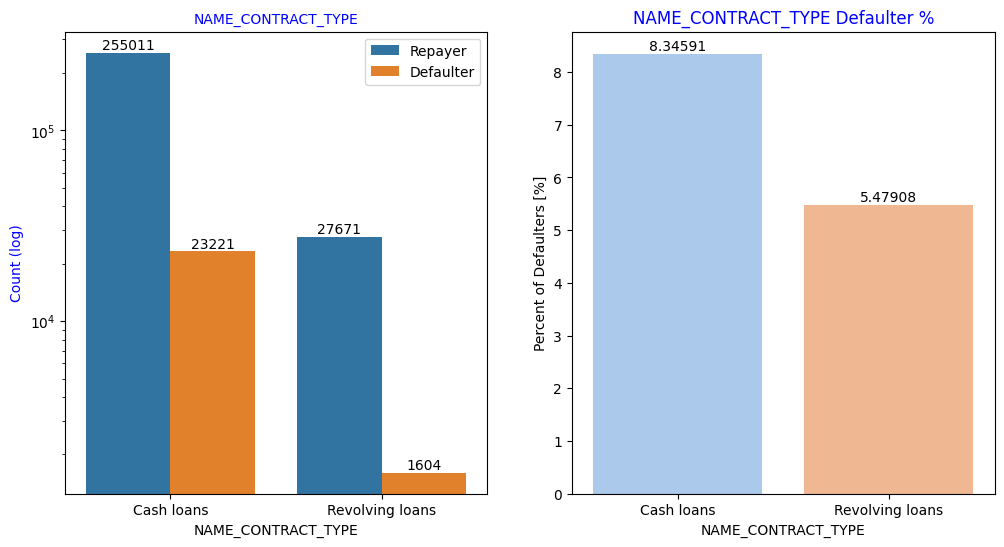

In [62]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

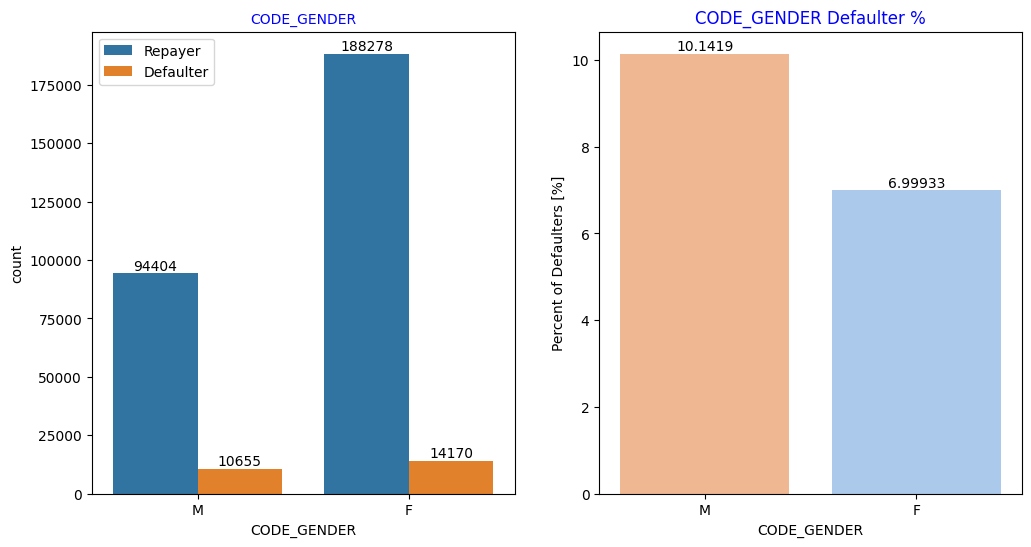

In [63]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

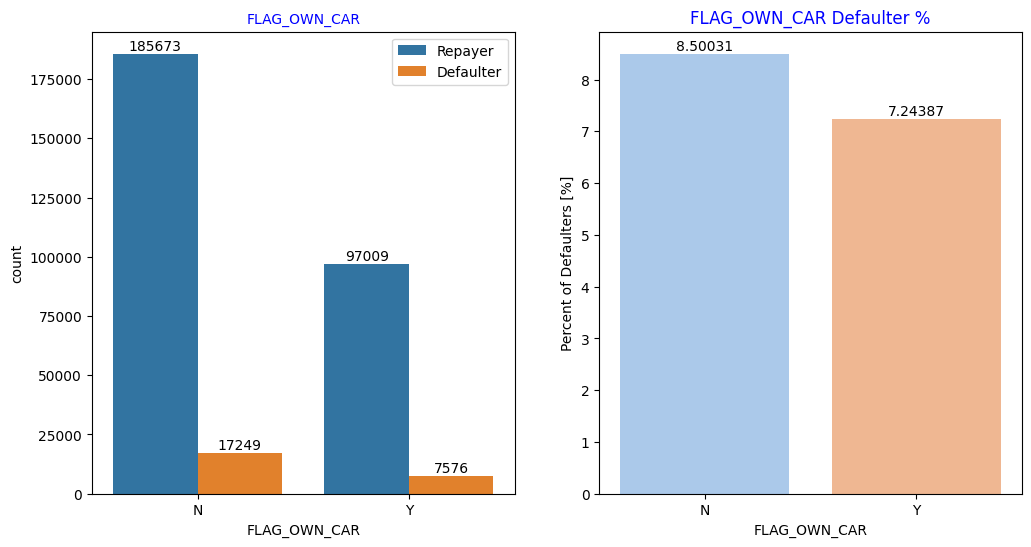

In [64]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

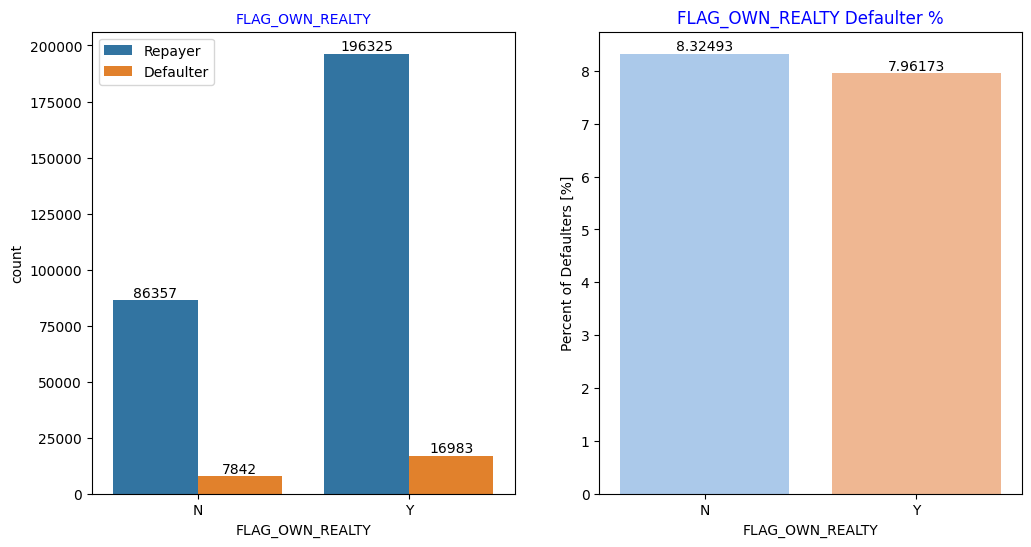

In [65]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


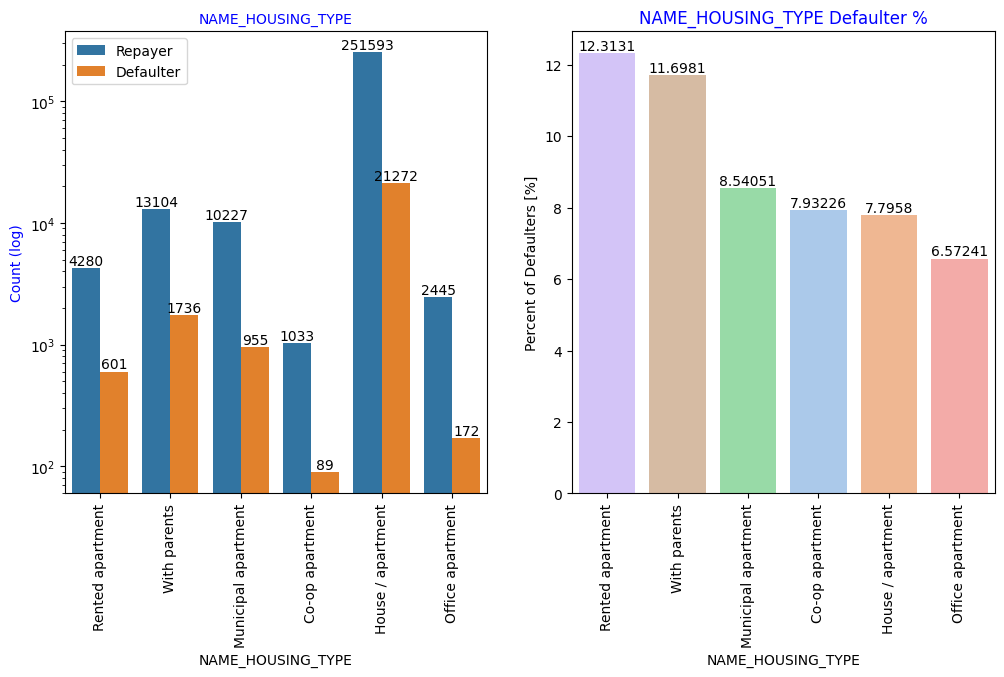

In [66]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True);

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


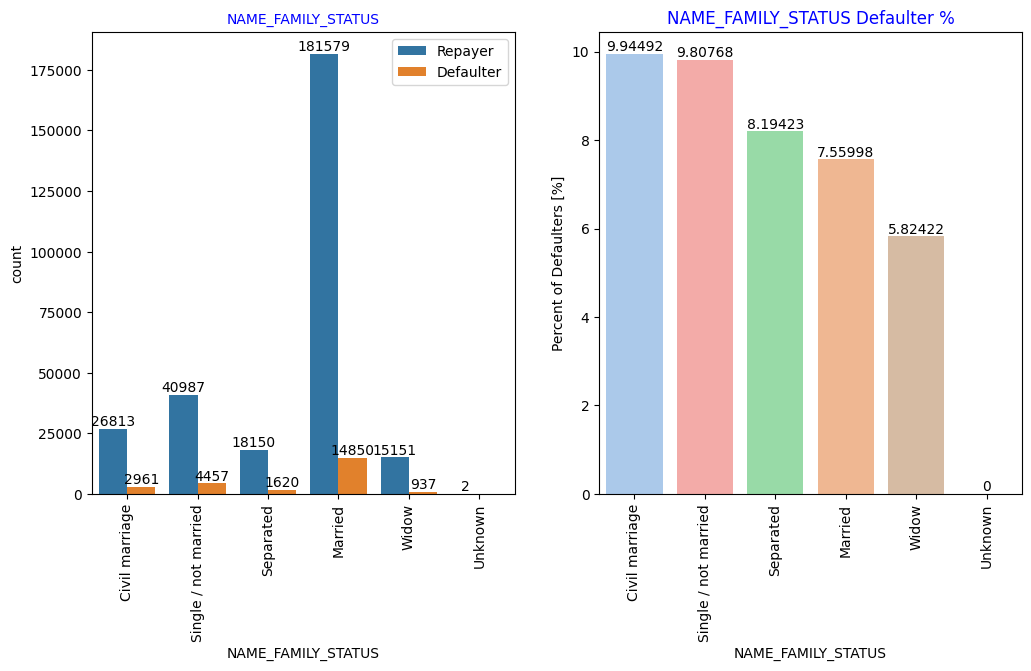

In [67]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


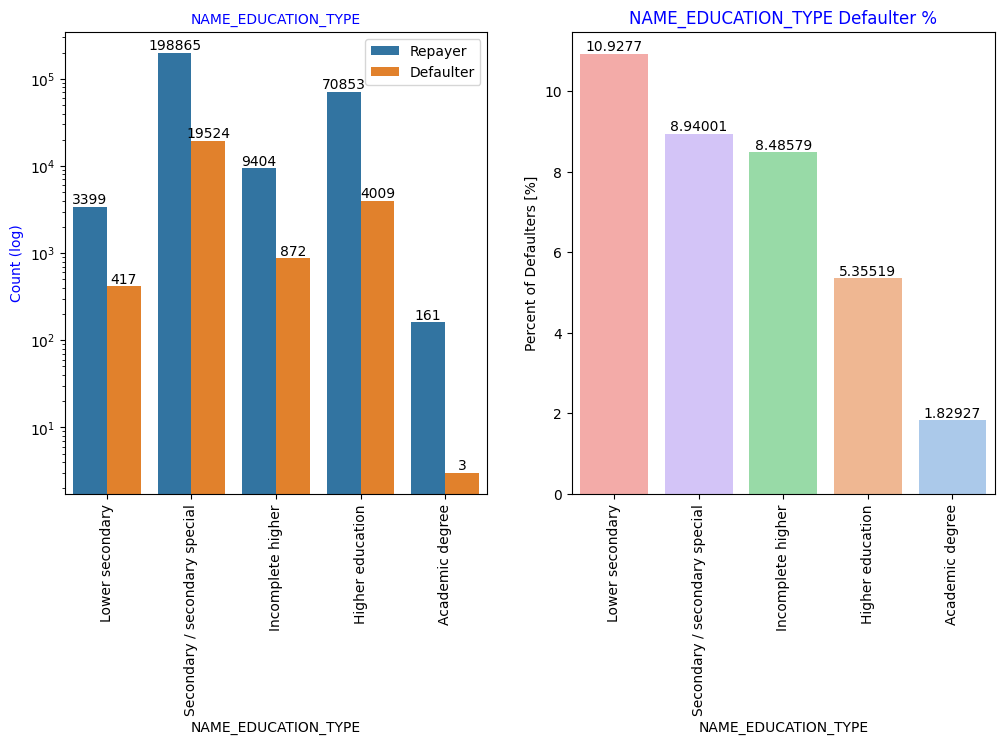

In [68]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


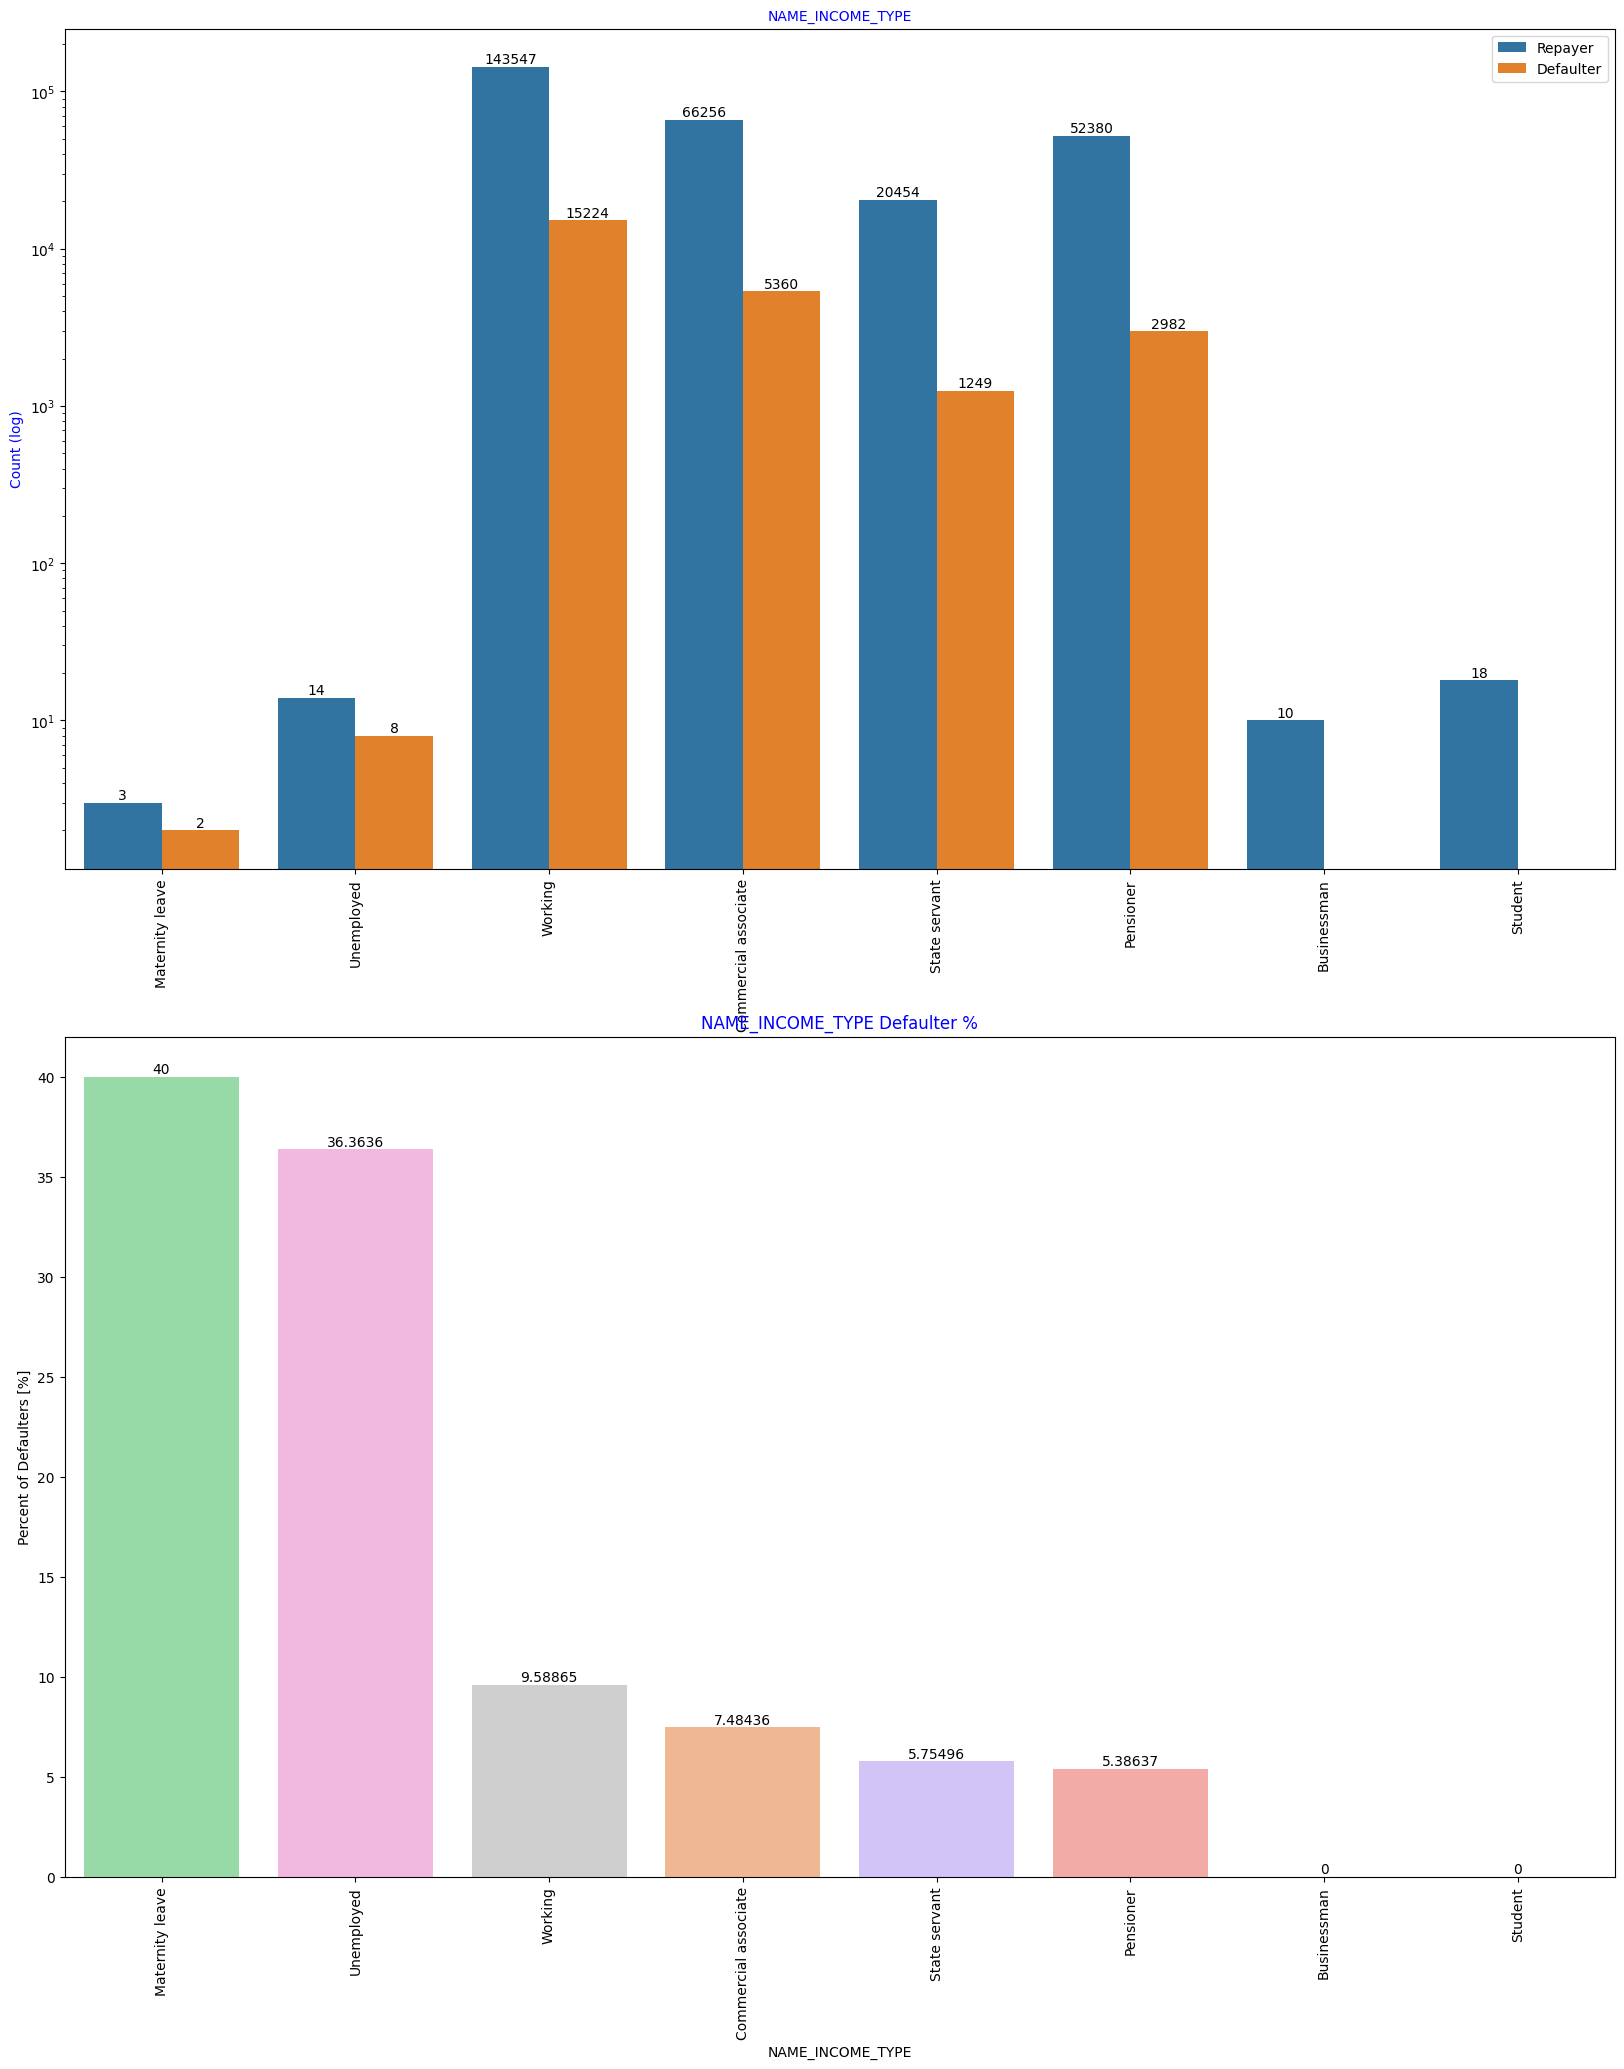

In [69]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

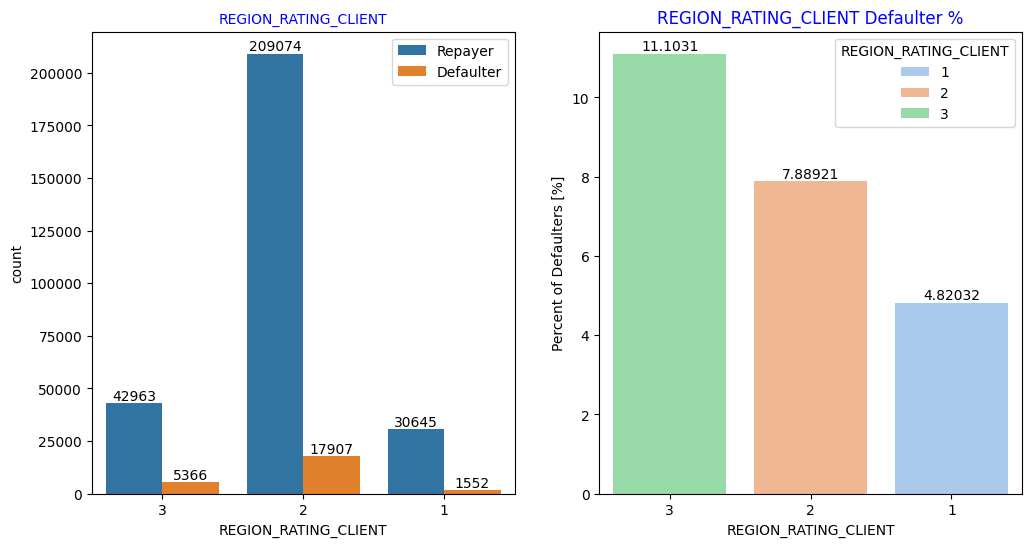

In [70]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


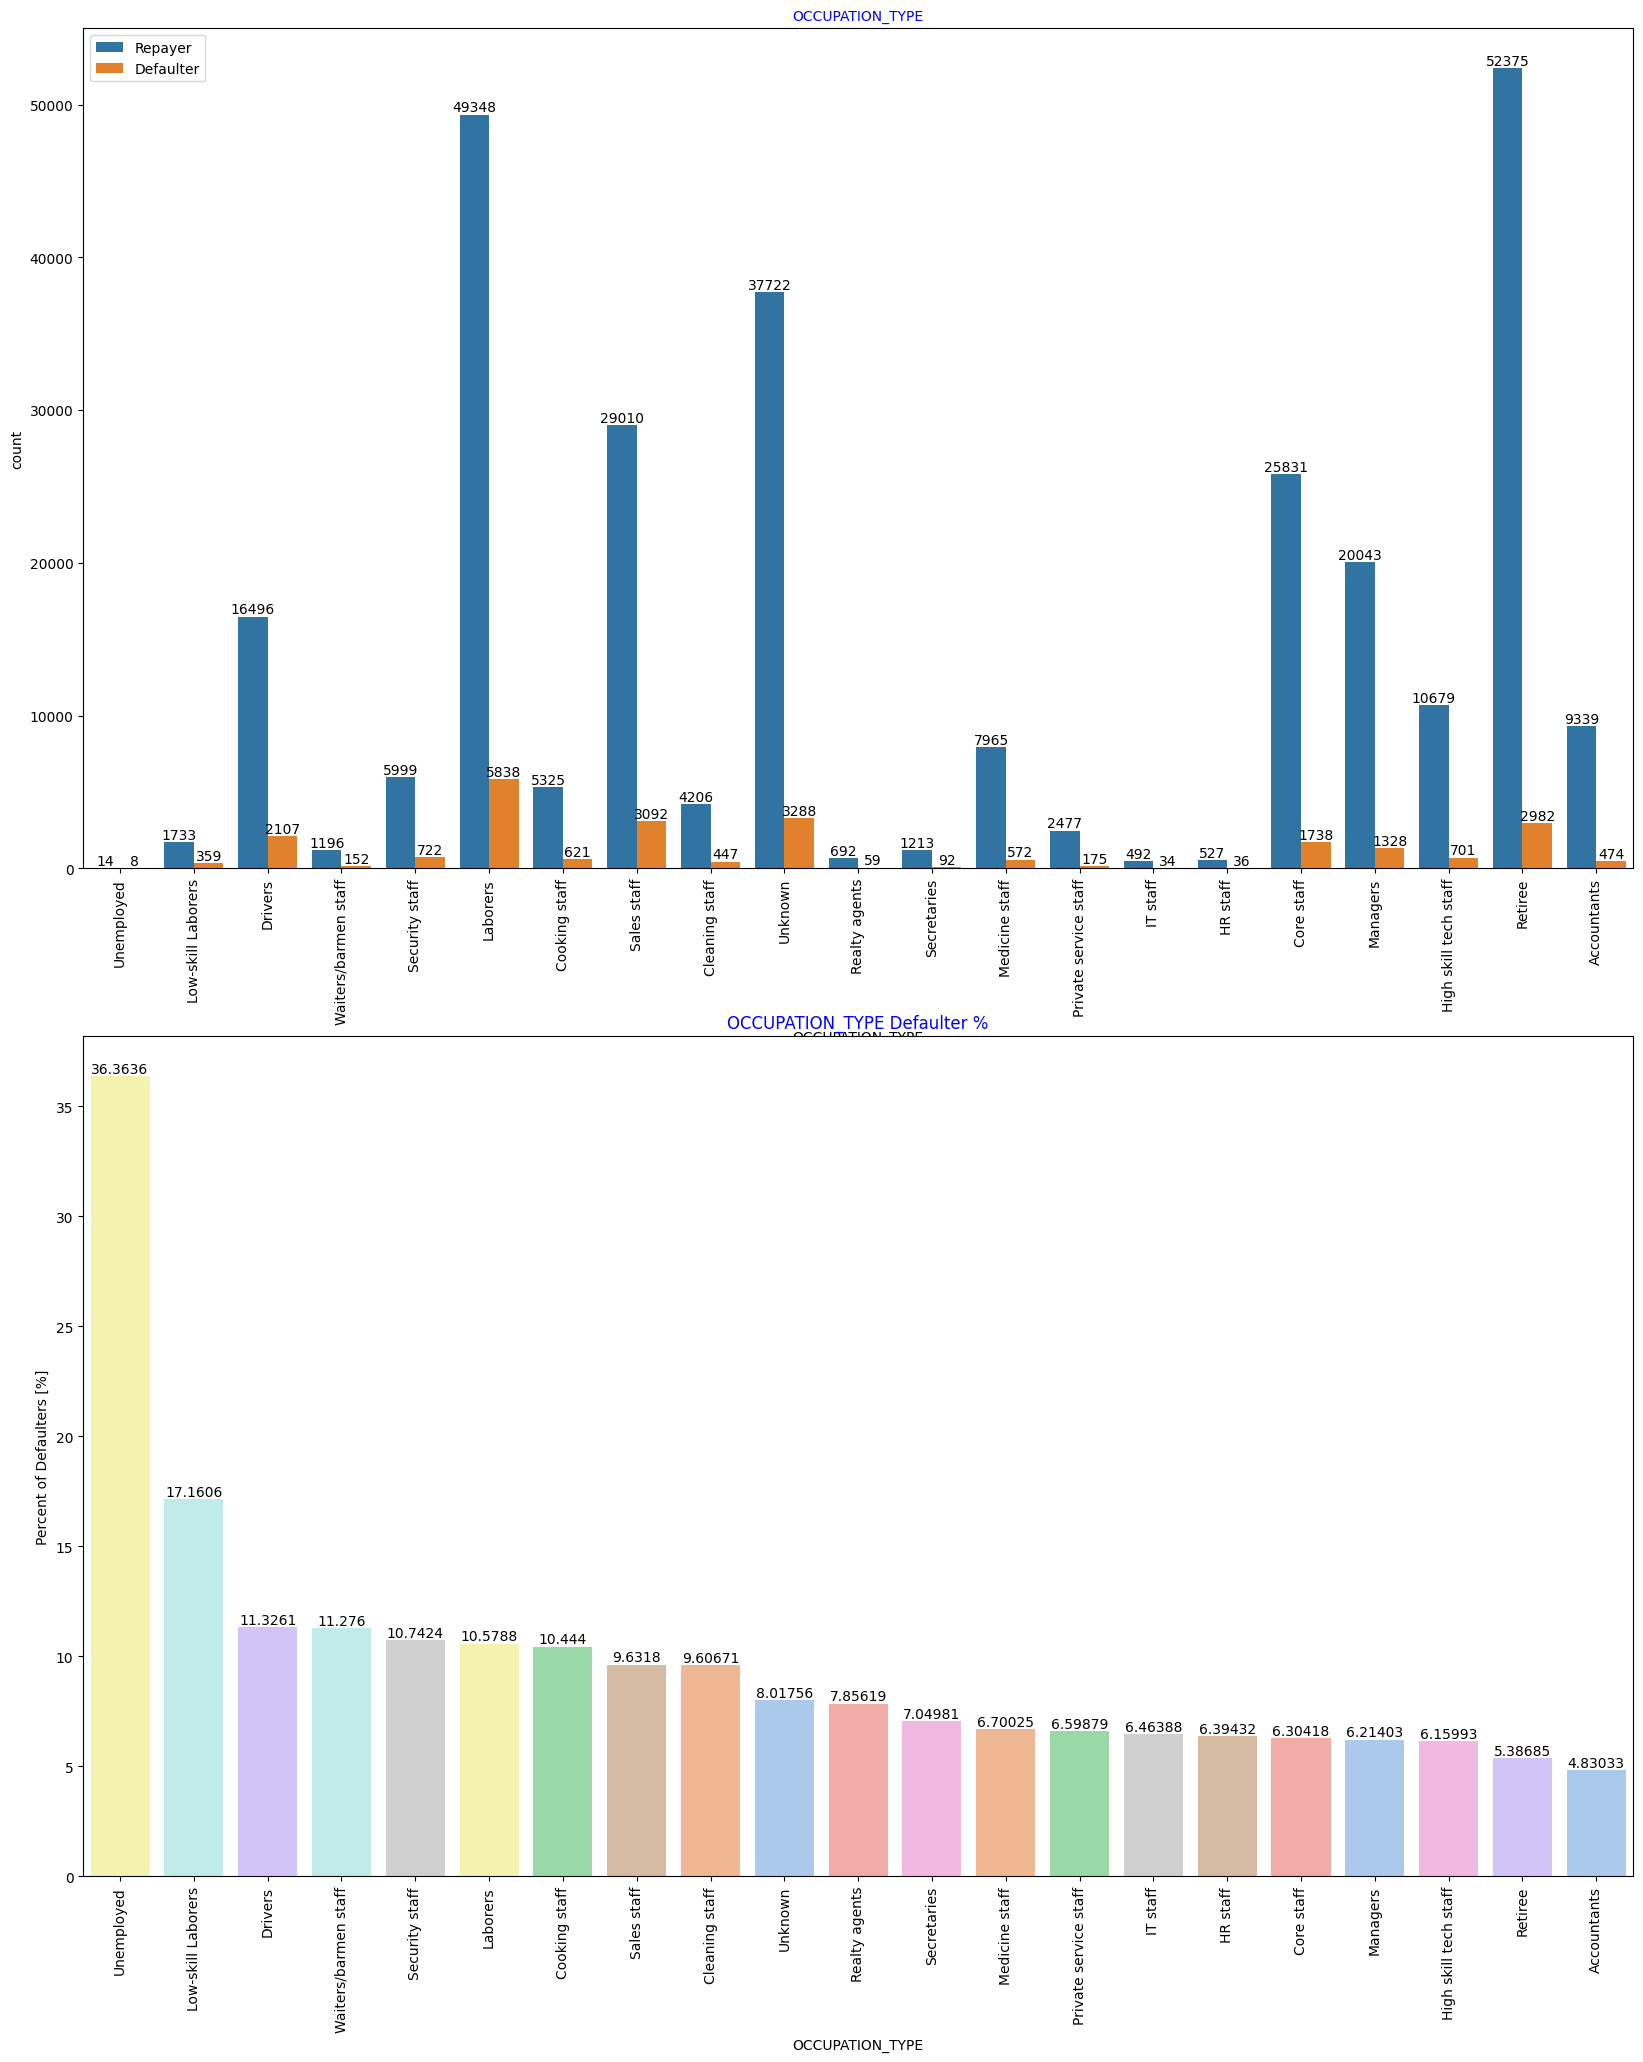

In [71]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2821583990.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


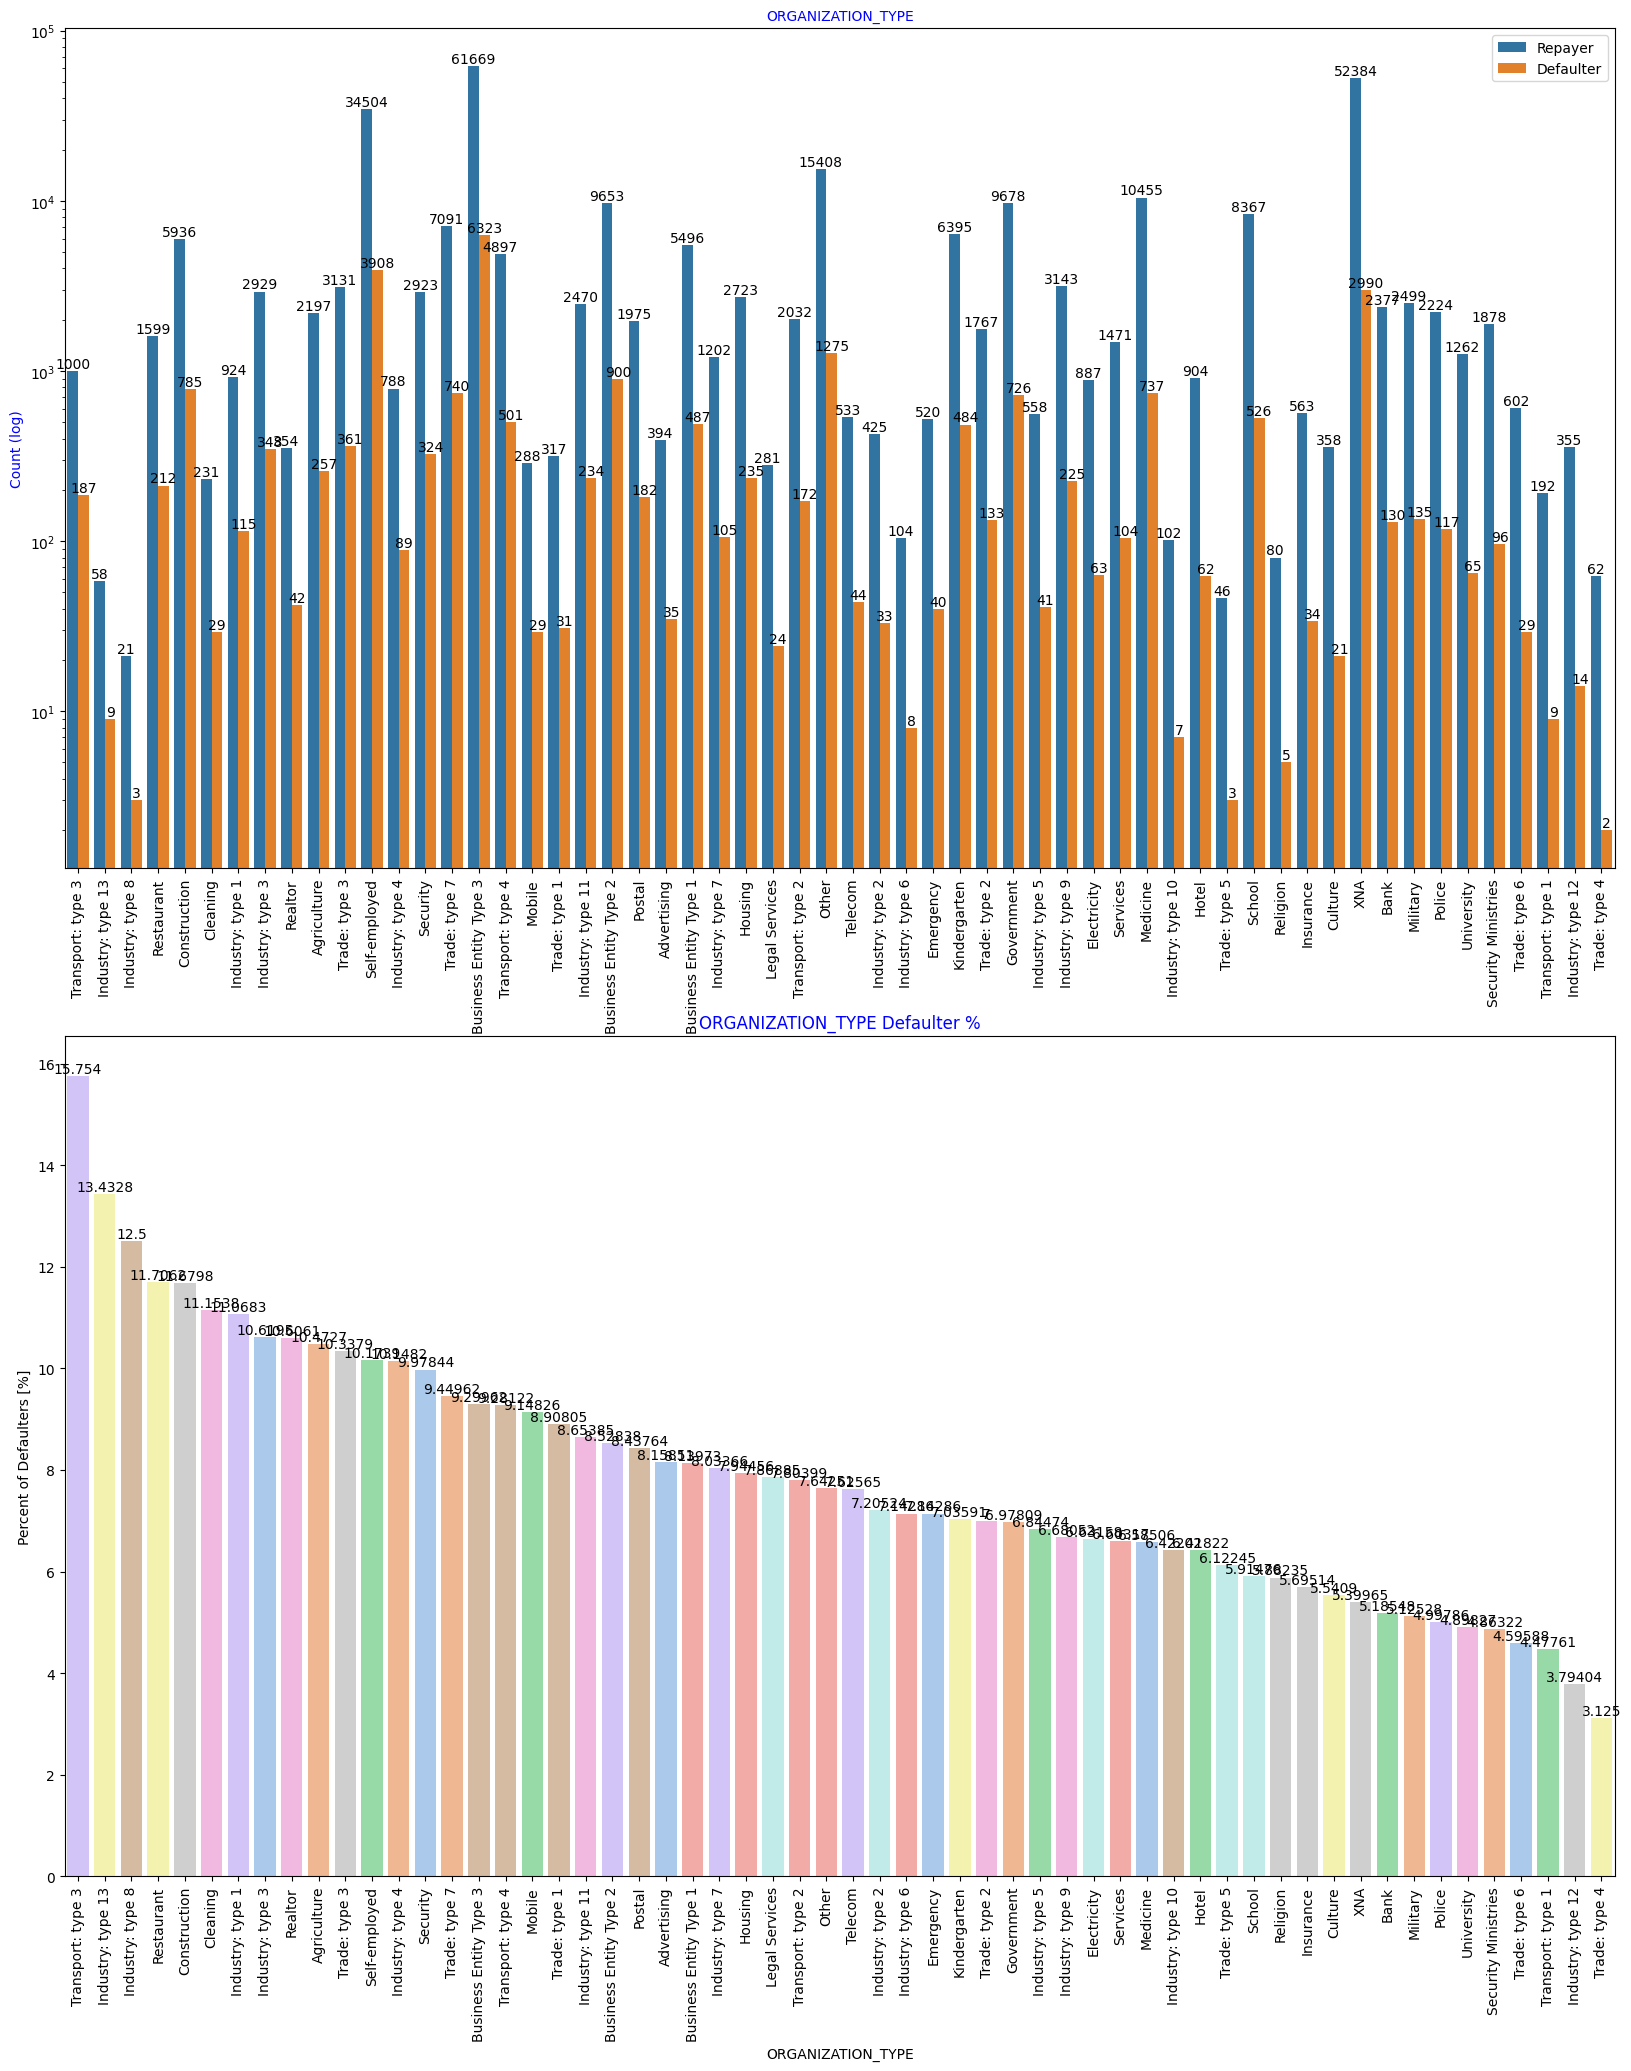

In [72]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

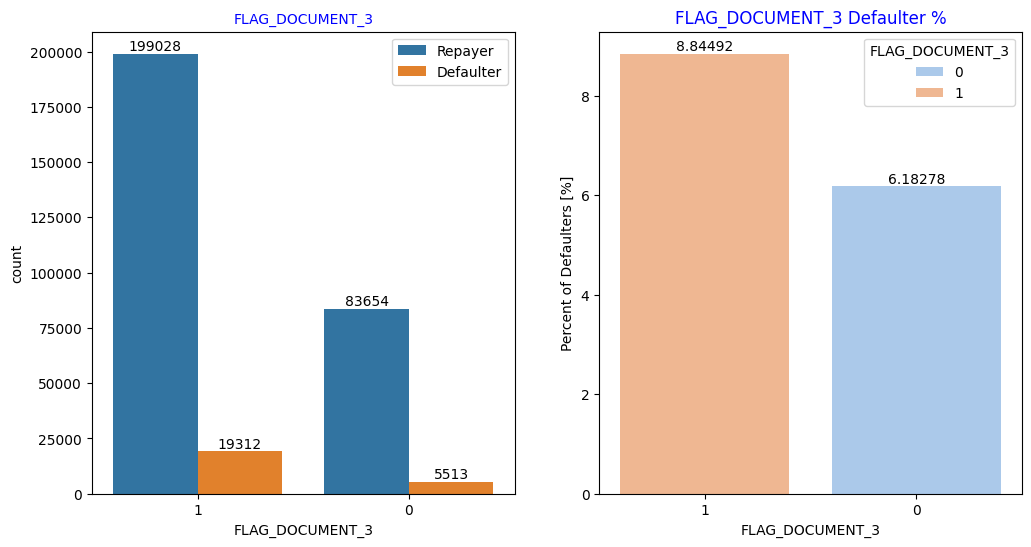

In [73]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

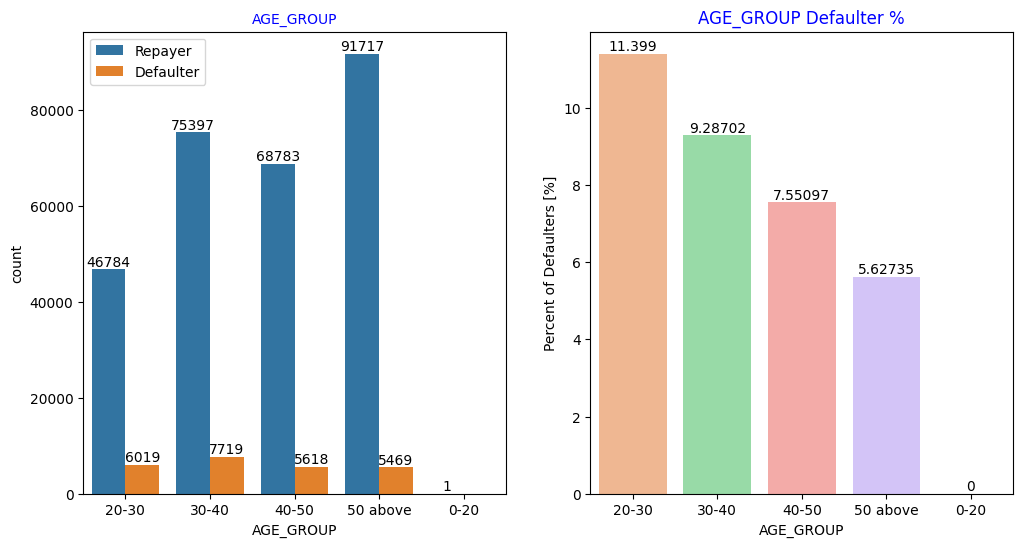

In [74]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

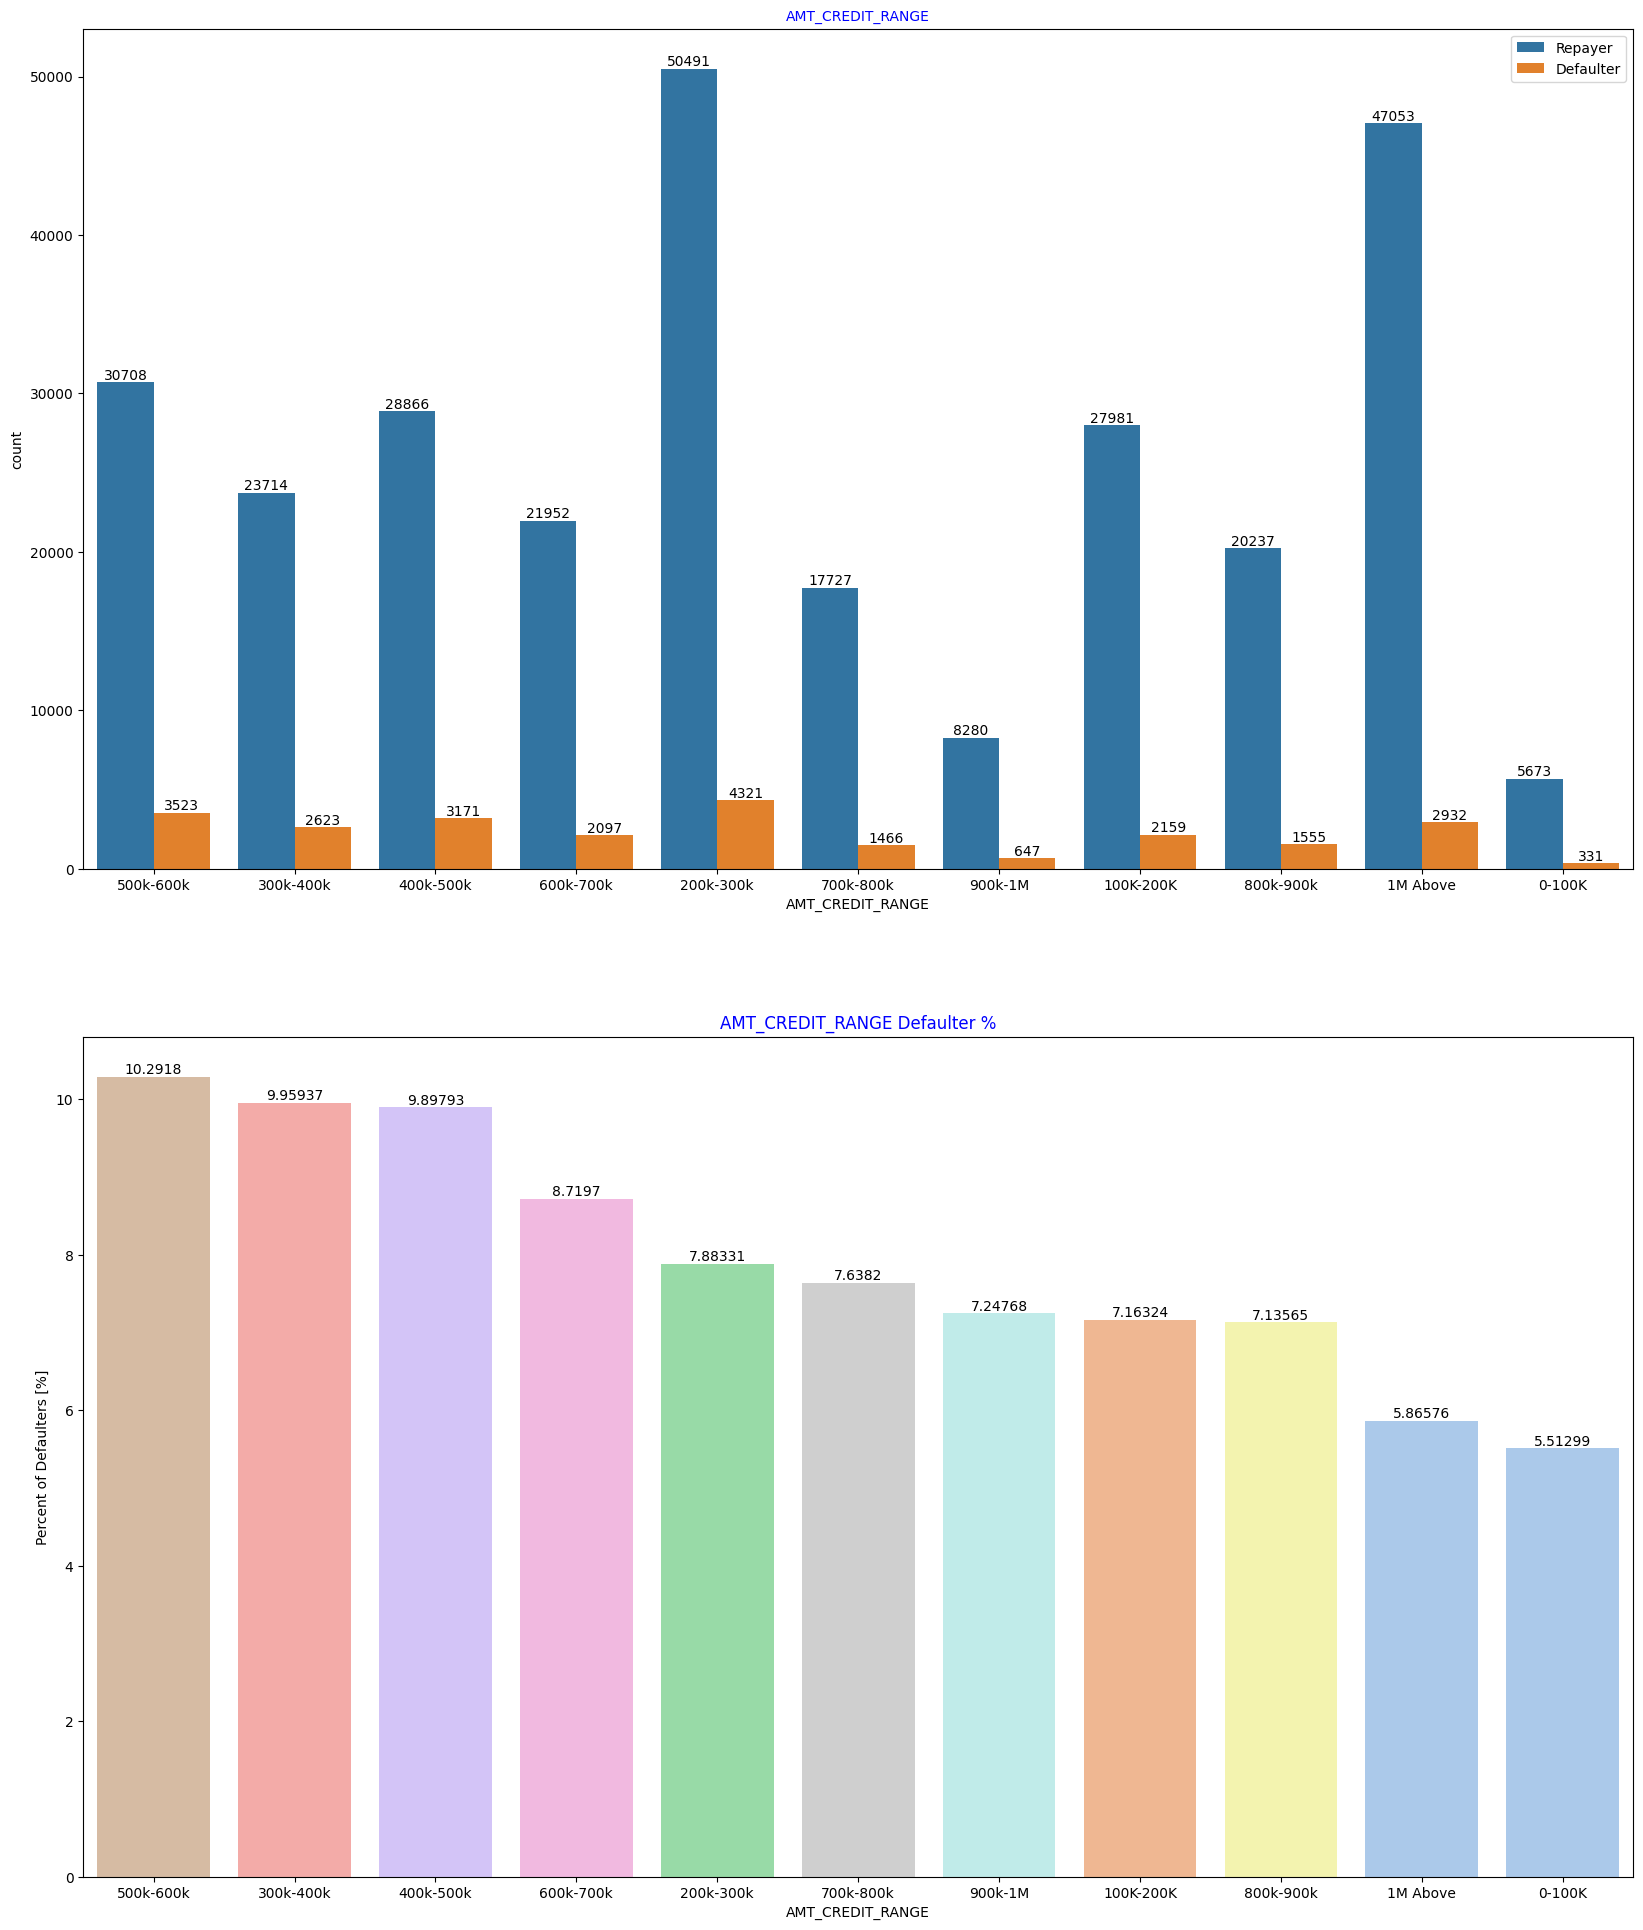

In [75]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

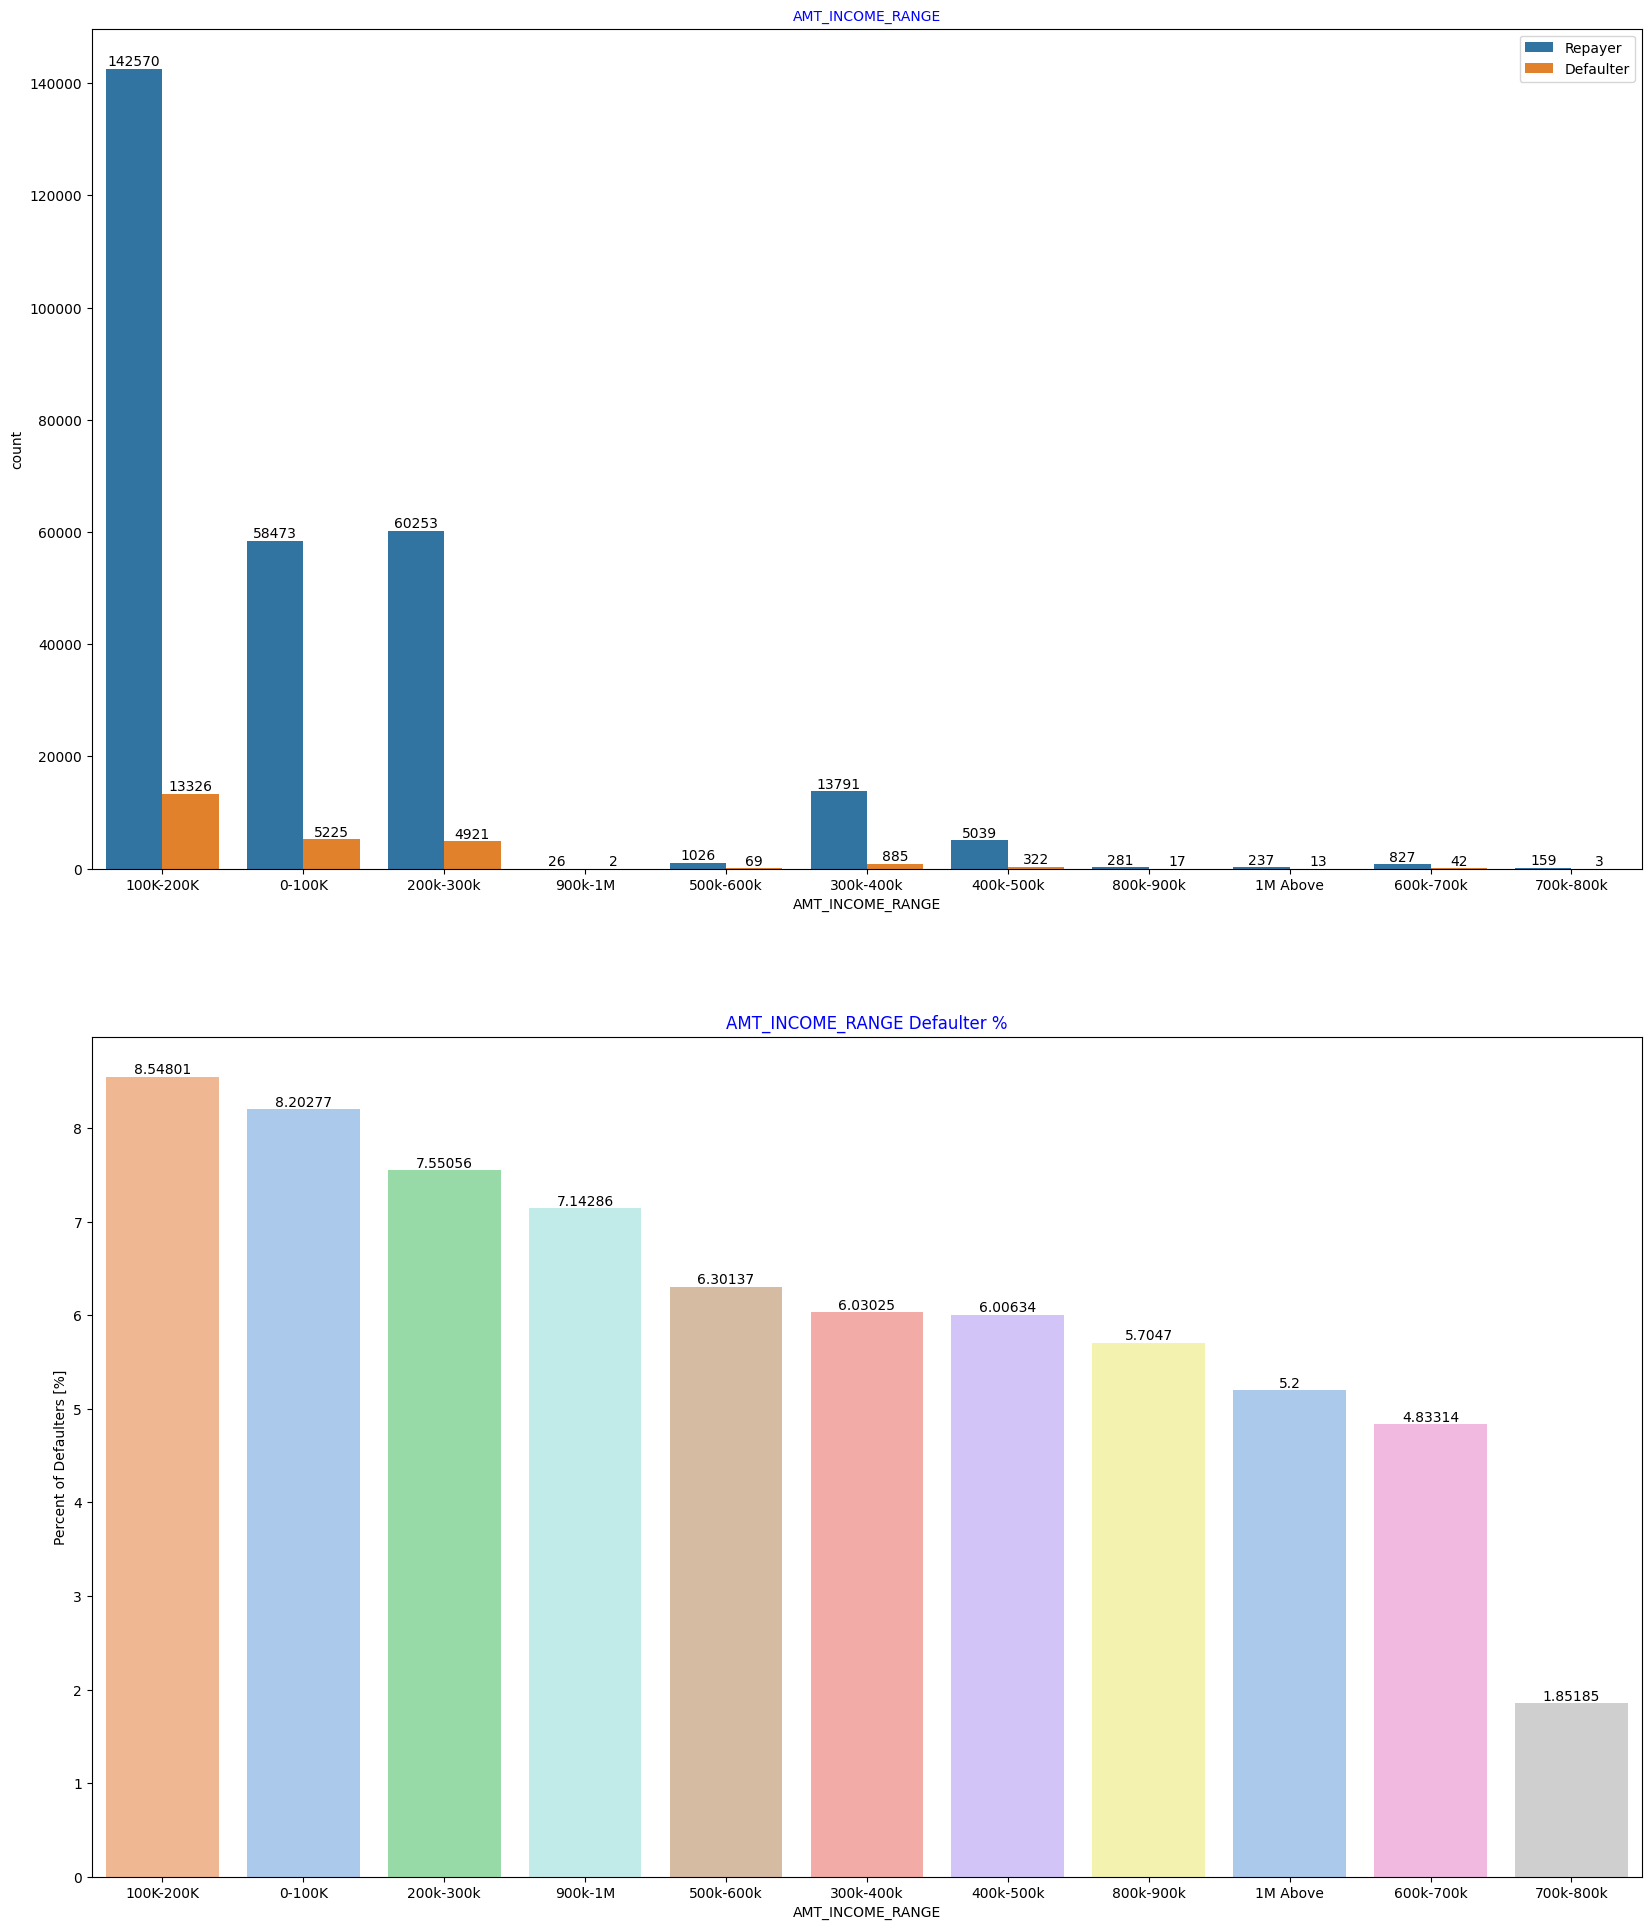

In [76]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

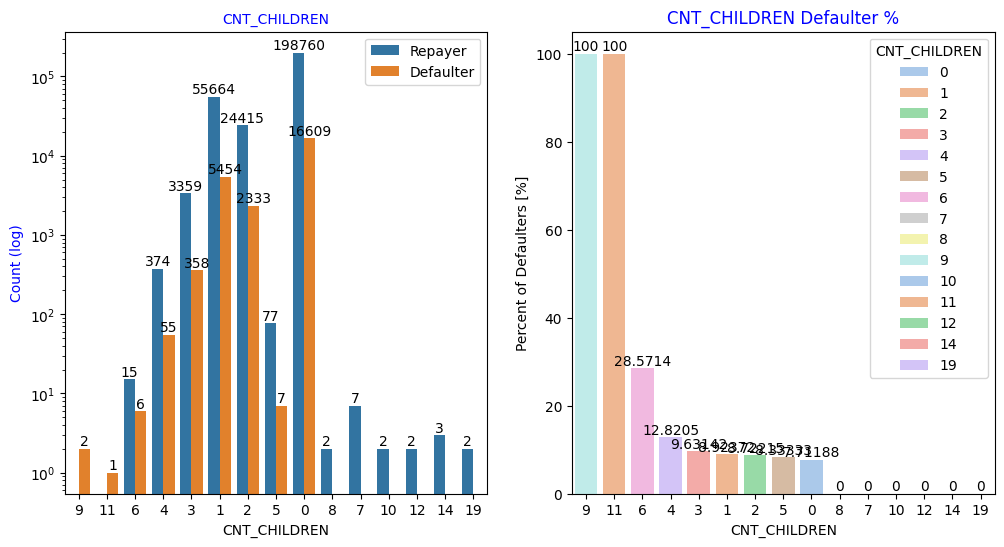

In [77]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN", True)

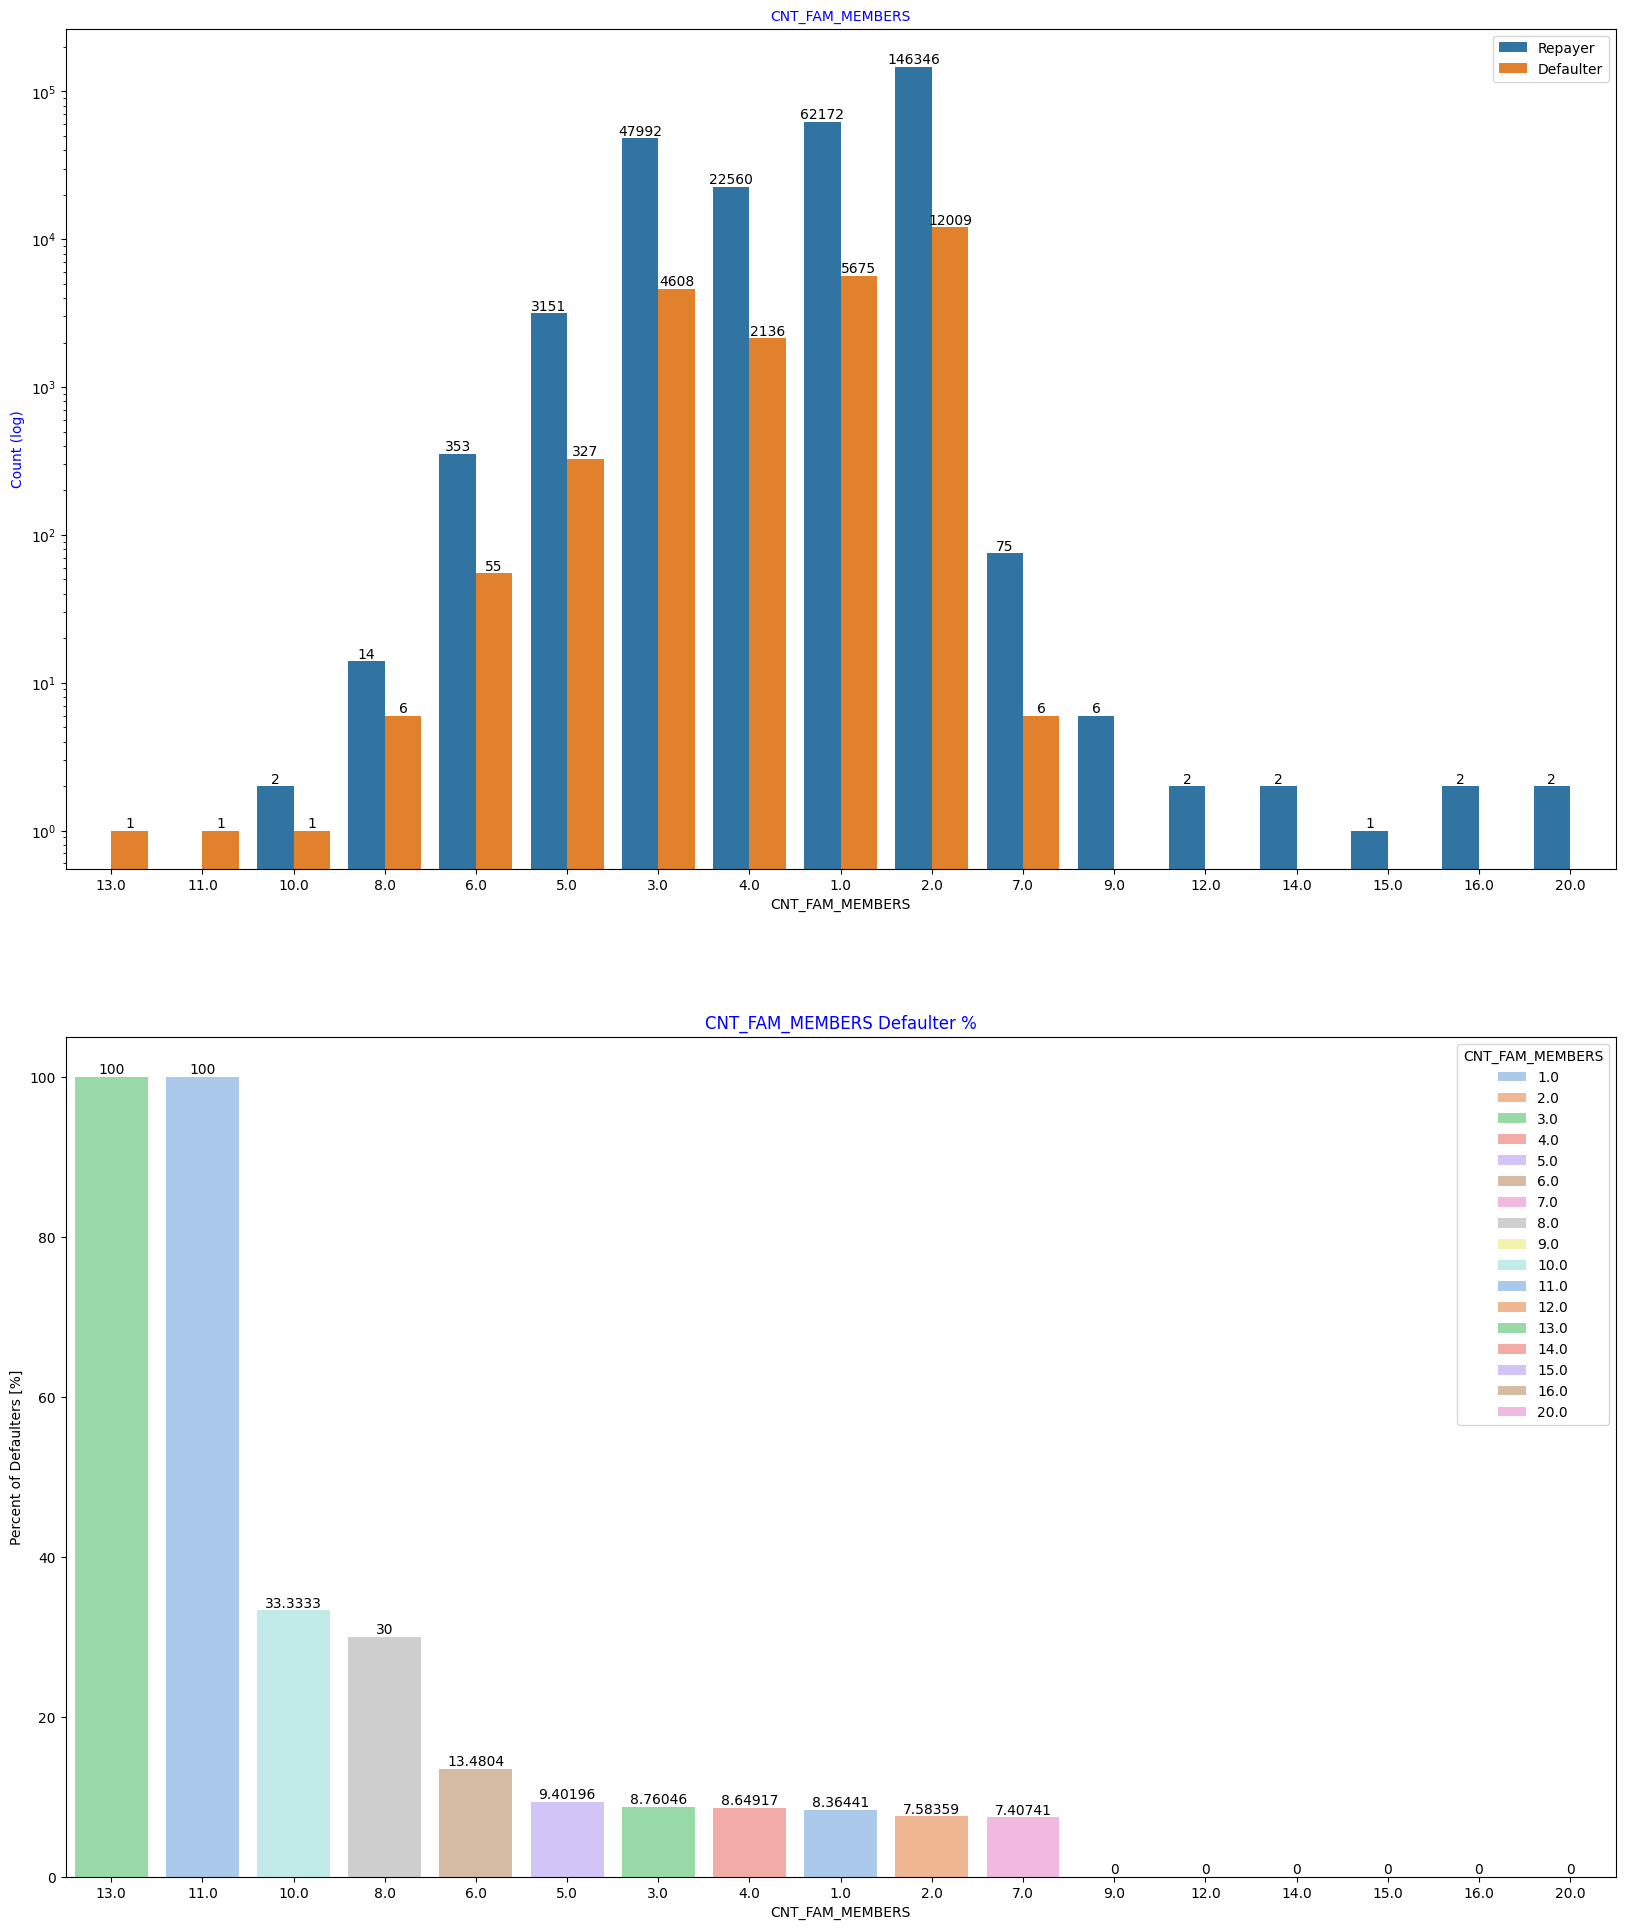

In [78]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

In [79]:
df_dropped.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\3559992205.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dropped.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()


count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71616.0  2.029547  1.479751  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158771.0  1.631698  3.075806  0.2565  1.125  1.3500  2.02500  1170.0000

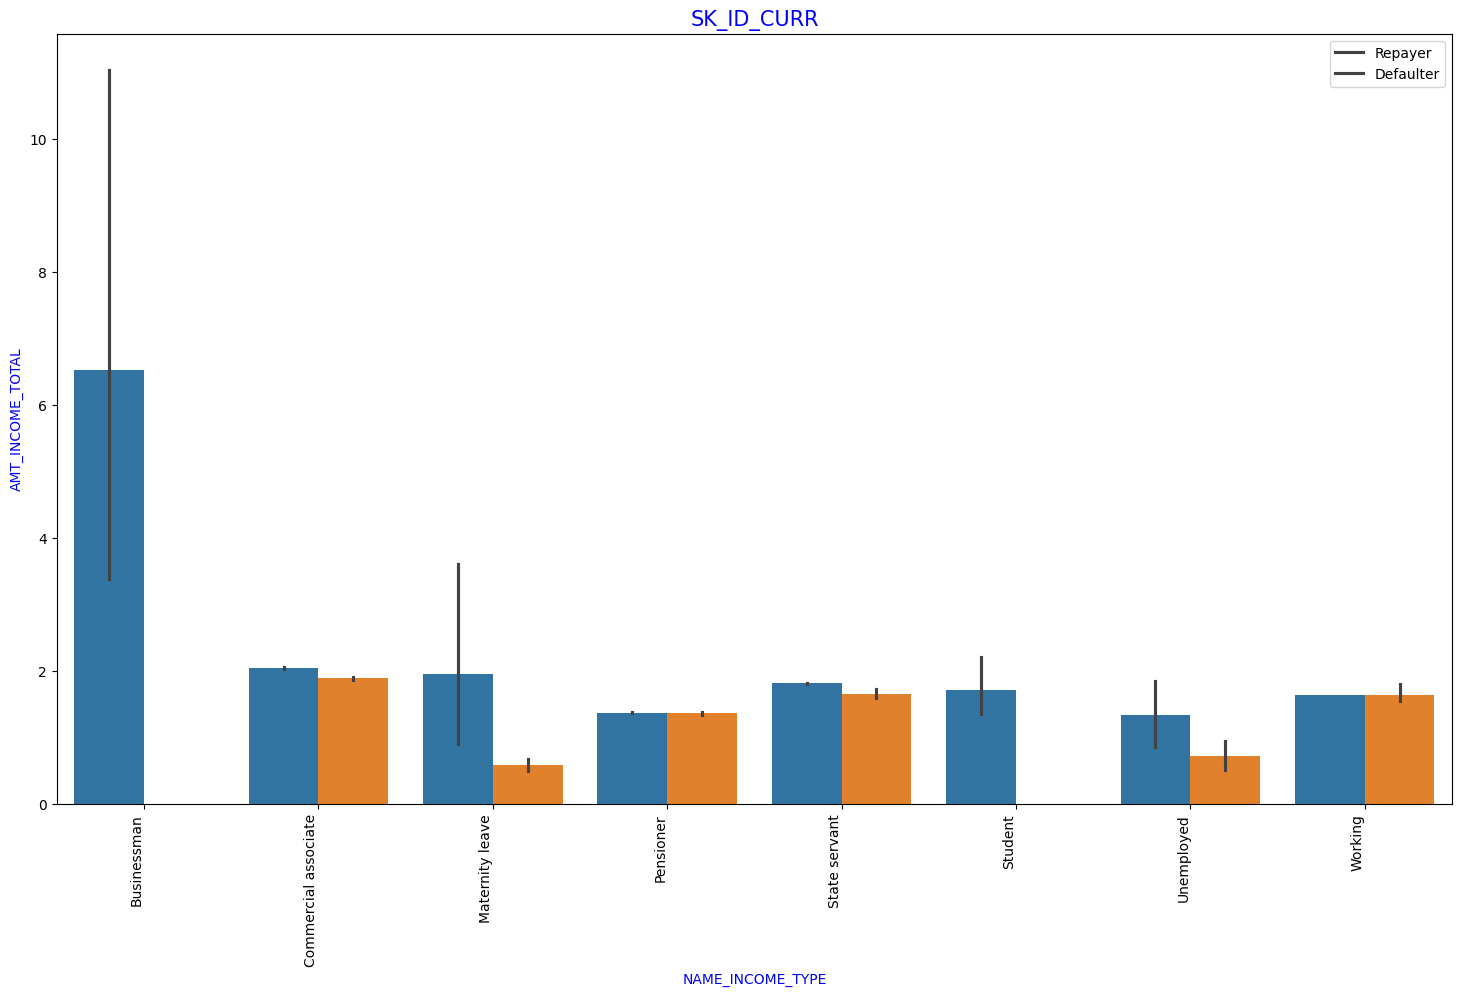

In [80]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df_dropped,"TARGET",(18,10))

## Visualizing Some Data

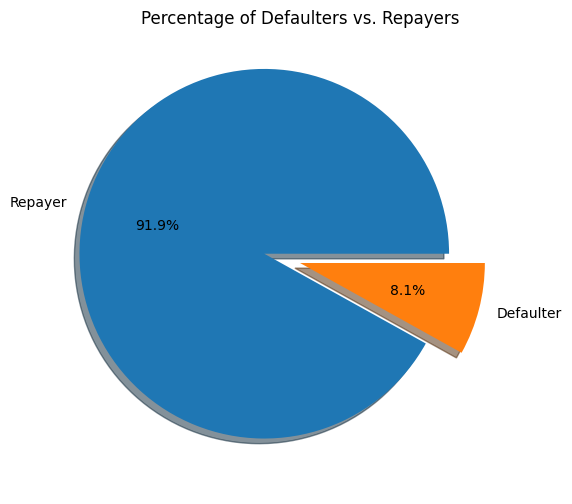

In [81]:
# determining the amount of clients with trouble making payments 
df_piechart = df_dropped['TARGET'].value_counts().reset_index()
df_piechart['TARGET'] = np.where(df_piechart['TARGET'] == 1, "Defaulter", "Repayer")
df_piechart

plt.figure(figsize=(10,6))
plt.pie(df_piechart['count'], 
        labels=df_piechart['TARGET'], 
        autopct='%.1f%%', 
        explode=[0.2, 0],
        shadow=True);
plt.title("Percentage of Defaulters vs. Repayers", loc='center');

Only 8.1% of borrowers defaulted on their loans

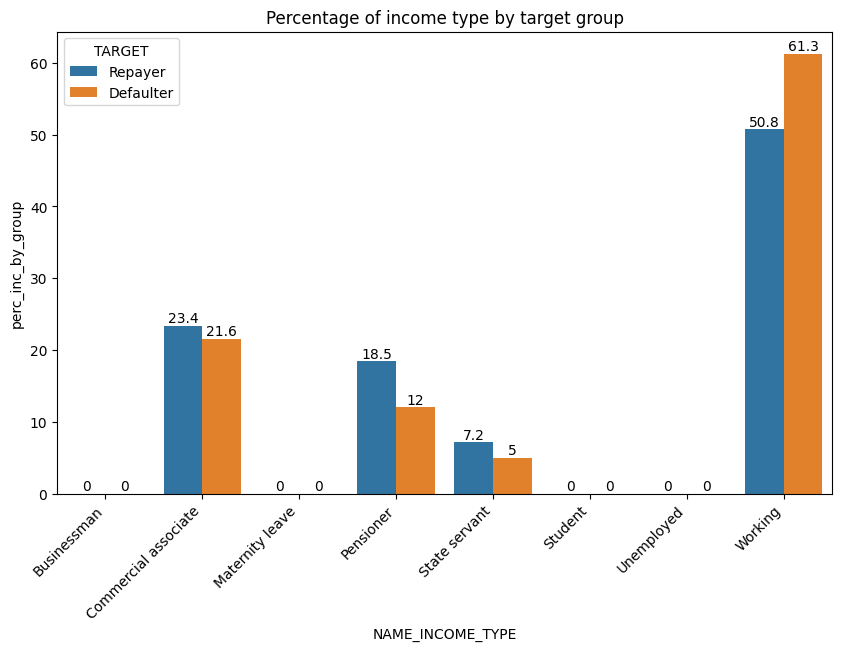

In [82]:
#comparing income types between the two target groups

df_income = df_dropped[['TARGET',
 'NAME_INCOME_TYPE']].groupby(['TARGET']).value_counts().reset_index()

df_sum_income = df_income.groupby(['TARGET']).agg(
    total_income = pd.NamedAgg(column='count', aggfunc='sum')).reset_index()

perc_income = df_income.merge(df_sum_income, on='TARGET')

perc_income['perc_inc_by_group'] = round((perc_income['count'] / perc_income['total_income'] * 100.0), 1)
perc_income['TARGET'] = np.where(perc_income['TARGET'] == 1, "Defaulter", "Repayer")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=perc_income['NAME_INCOME_TYPE'],
    y=perc_income['perc_inc_by_group'],
    hue=perc_income['TARGET'],
    errorbar=None);
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(label='Percentage of income type by target group');

The bar chart shows that the percentage of defaulters is highest for clients with income type 'Working'

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2971752611.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_sum_educ = df_educ.groupby(['TARGET']).agg(


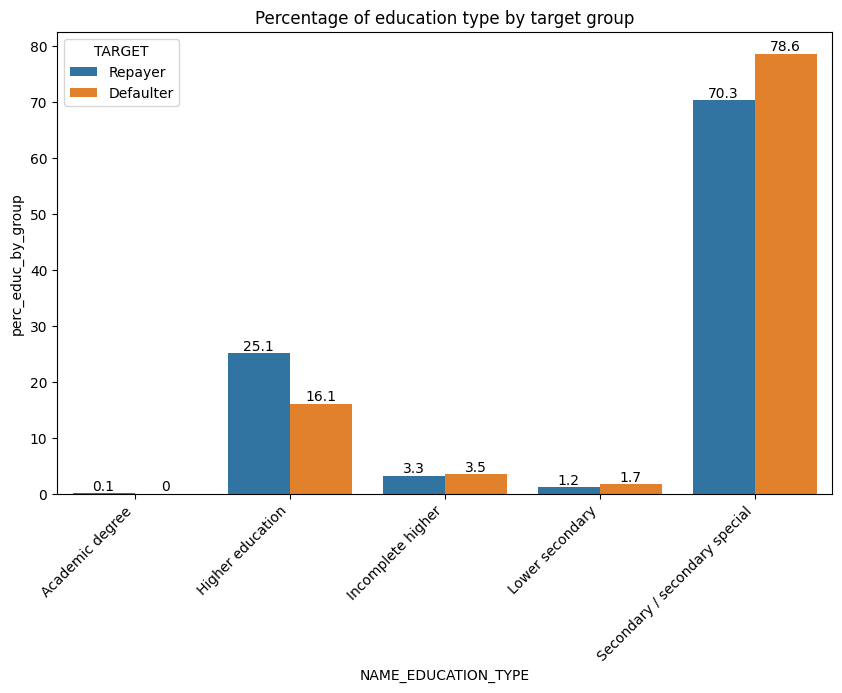

In [83]:
df_educ = df_dropped[['TARGET',
 'NAME_EDUCATION_TYPE']].groupby(['TARGET']).value_counts().reset_index()

df_sum_educ = df_educ.groupby(['TARGET']).agg(
    total_educ = pd.NamedAgg(column='count', aggfunc=sum)).reset_index()

perc_educ = df_educ.merge(df_sum_educ, on='TARGET')

perc_educ['perc_educ_by_group'] = round((perc_educ['count'] / perc_educ['total_educ'] * 100.0),1)
perc_educ['TARGET'] = np.where(perc_educ['TARGET'] == 1, "Defaulter", "Repayer")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=perc_educ['NAME_EDUCATION_TYPE'],
    y=perc_educ['perc_educ_by_group'],
    hue=perc_educ['TARGET'],
    errorbar=('ci', False));
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(label='Percentage of education type by target group');

# The bar chart shows that the percentage of defaulters is highest for clients with education type 'Secondary / secondary special'

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\2341970341.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df_dropped.groupby(['TARGET', 'NAME_HOUSING_TYPE']).size().reset_index(name='count')


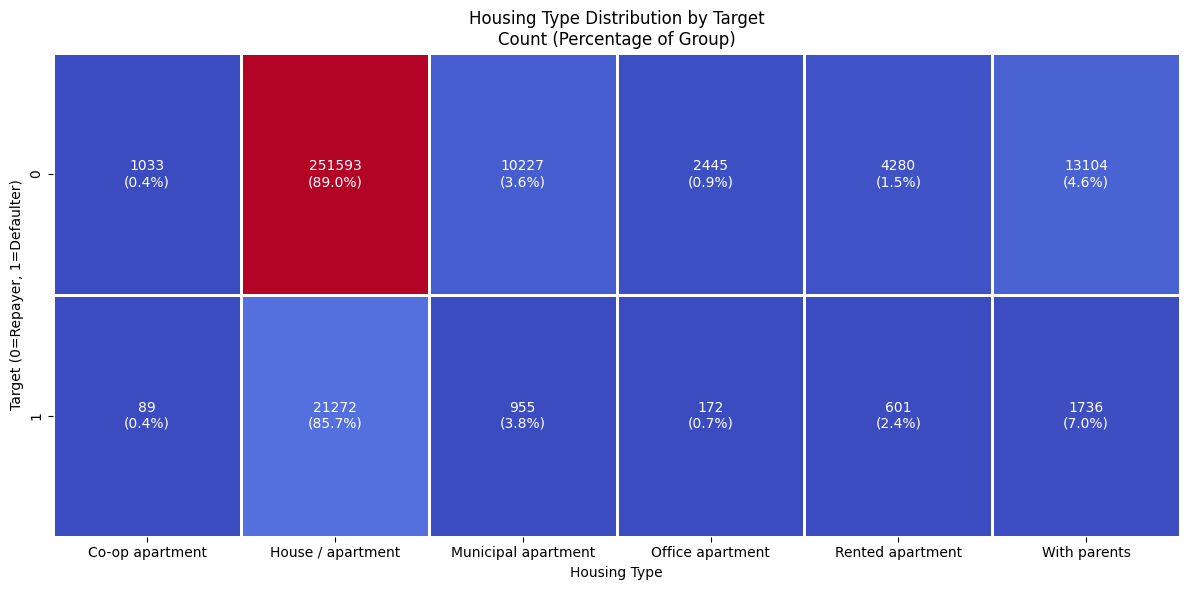

In [84]:
# Grouping by 'TARGET' and 'NAME_FAMILY_STATUS' 
count_df = df_dropped.groupby(['TARGET', 'NAME_HOUSING_TYPE']).size().reset_index(name='count')

# Calculate the total counts for each 'TARGET' group
total_counts = count_df.groupby('TARGET')['count'].transform('sum')

# Calculate the percentage of each 'NAME_HOUSING_TYPE' within each 'TARGET' group
count_df['percent'] = (count_df['count'] / total_counts * 100).round(1)

# Create a new column with the count and percentage for each 'NAME_HOUSING_TYPE'
count_df['label'] = count_df['count'].astype(str) + '\n(' + count_df['percent'].astype(str) + '%)'

# Pivot the data so that 'NAME_HOUSING_TYPE' is the column and 'TARGET' is the index
pivot_count = count_df.pivot(index='TARGET', columns='NAME_HOUSING_TYPE', values='count').fillna(0)
pivot_label = count_df.pivot(index='TARGET', columns='NAME_HOUSING_TYPE', values='label').fillna('')

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    pivot_count, 
    annot=pivot_label.values,  # Use our combined labels
    fmt='',                   # Empty fmt since we pre-formatted
    cmap='coolwarm', 
    cbar = False,
    linewidths=1,
    annot_kws={'ha': 'center', 'va': 'center'}
)

# Set the axis labels and plot title
plt.title('Housing Type Distribution by Target\nCount (Percentage of Group)')
plt.xlabel('Housing Type')
plt.ylabel('Target (0=Repayer, 1=Defaulter)')
plt.tight_layout()
plt.show()

In [85]:
df_dropped[['TARGET', 
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE']].groupby(['TARGET']).mean()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE
TARGET                                                                           
0           0.412941          1.690775    6.026512  27163.725162    542738.506775
1           0.463807          1.656118    5.577785  26481.744290    488972.412554

- The table shows that the average number of children is higher for defaulters than non-defaulters
- However average income, credit amount, annuity amount and goods price is lower for defaulters than non-defaulters

CNT_CHILDREN                AMT_INCOME_TOTAL                           AMT_CREDIT                           AMT_ANNUITY                            AMT_GOODS_PRICE                              
               mean median min max             mean median     min        max       mean   median   min      max          mean   median     min       max            mean    median      min        max
TARGET                                                                                                                                                                                                 
0          0.412941    0.0   0  19         1.690775  1.485  0.2565   180.0009   6.026512  5.17788  0.45  40.5000  27163.725162  24876.0  1615.5  258025.5   542738.506775  450000.0  40500.0  4050000.0
1          0.463807    0.0   0  11         1.656118  1.350  0.2565  1170.0000   5.577785  4.97520  0.45  40.2768  26481.744290  25263.0  2722.5  149211.0   488972.412554  450000.0  45000.0  3600000.0

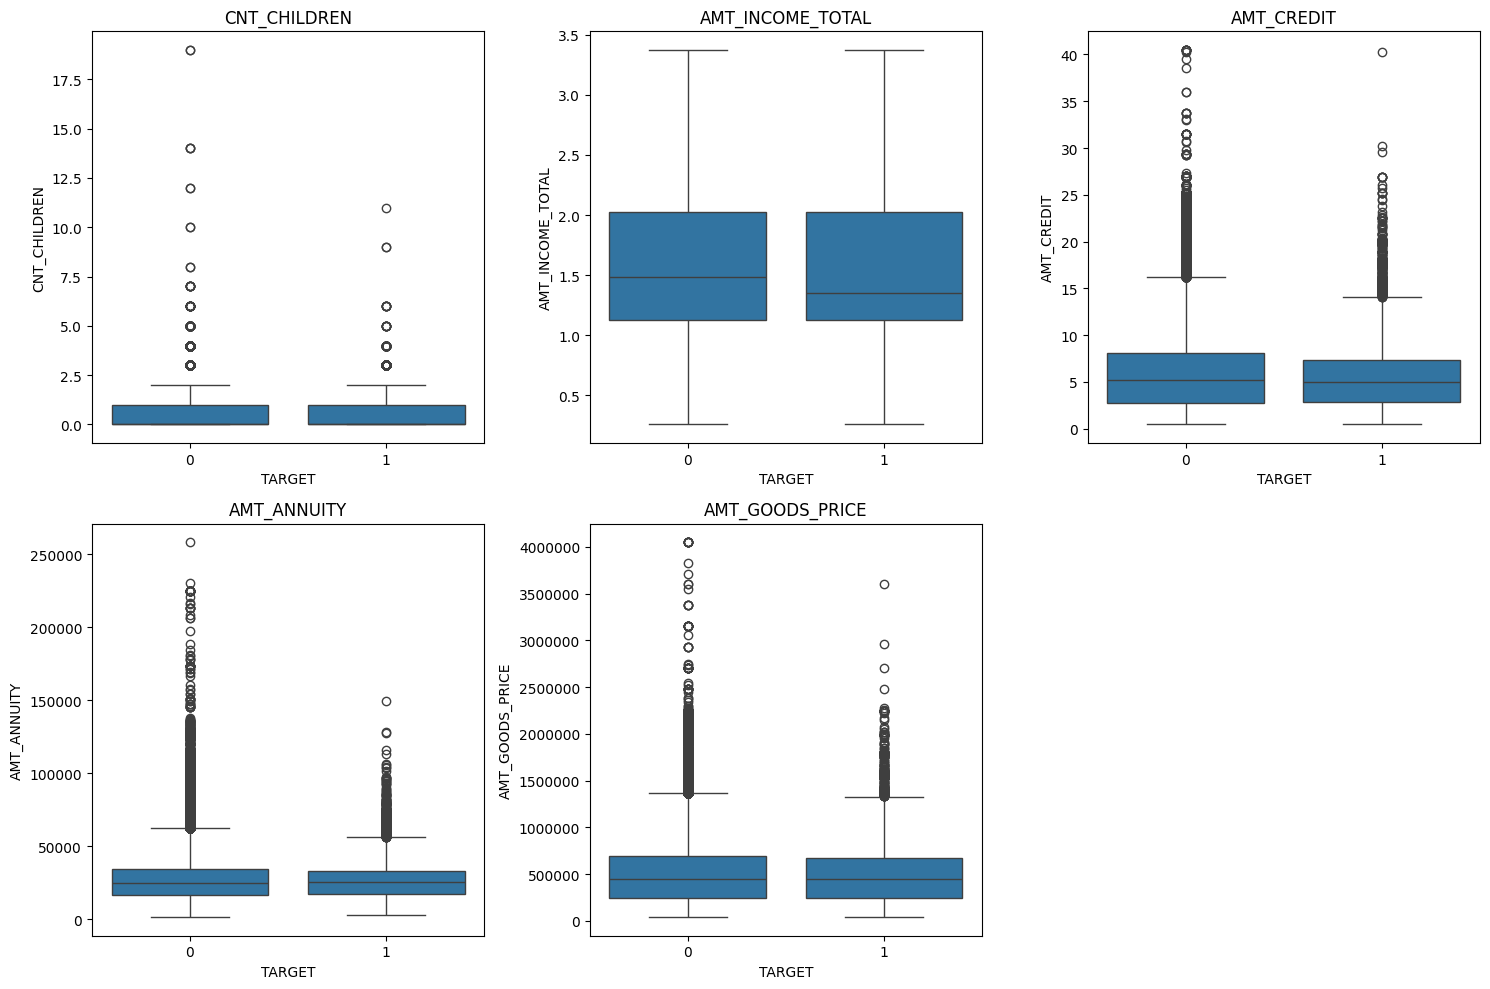

In [86]:
# aggregated table for children, income, credit, annuity, loan amt
agg_df = df_dropped.groupby(['TARGET']).agg(
    {'CNT_CHILDREN': ['mean', 'median', 'min', 'max'],
 'AMT_INCOME_TOTAL': ['mean', 'median', 'min', 'max'],
 'AMT_CREDIT': ['mean', 'median', 'min', 'max'],
 'AMT_ANNUITY': ['mean', 'median', 'min', 'max'],
 'AMT_GOODS_PRICE': ['mean', 'median', 'min', 'max']})
display(agg_df)

plt.figure(figsize=(15, 10))

# Create a boxplot for each column
plt.subplot(2, 3, 1)
sns.boxplot(x='TARGET', y='CNT_CHILDREN', data=df_dropped)
plt.title('CNT_CHILDREN')

plt.subplot(2, 3, 2)
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_dropped, showfliers=False)
plt.title('AMT_INCOME_TOTAL')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 3, 3)
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_dropped)
plt.title('AMT_CREDIT')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 3, 4)
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df_dropped)
plt.title('AMT_ANNUITY')

plt.subplot(2, 3, 5)
sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=df_dropped)
plt.title('AMT_GOODS_PRICE')
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

** note to self: when referencing multiple columns from df you need double brackets

**insights**
- For the dataset, we are going to denote the target variable of value 1 to be individuals that have defaulted on their loan(s).
- Based on the aggregate functions, we can see that defaulters on average have more children, but the median shows that the sample population mostly do not have childern. 
- The median and mean income of loan defaulters is lower than non-defaulters. However, there is one potential major outlier in the loan defaulters group with an income of $117,000,000. Outside of that outlier, the graph for the amount income is comparable between the two groups.
- The median and mean amount of credit is also lower for loan defaulter than that of non-defaulters. From the plot, we can see that non-defaulters interquartile range is larger and skews higher than the defaulters range, but both have relatively similar variablity.
- The mean amount annuity is lower for defaulters and the median amount annuity is higher for defaulters. From the plot, non-defaulters have a much higher spread and variability with significantly more outliers in magnitude. 
- The mean mean good price amount is lower for defaulters with the median amount being the same for defaulters and non-defaulters. From the plot, non-defaulters have a much higher spread and variability with signficiantly more outliers in magnitude.

In [87]:
df_dropped[['TARGET', 
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',]].groupby(['TARGET']).mean()
#check if there are correlated in any way

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE
TARGET                                                                                                        
0                       1.415702                  0.139132                  1.398882                  0.096671
1                       1.496147                  0.191980                  1.477672                  0.138247

- I still don't really know what this means ^ 

In [88]:
df_dropped[['TARGET', 
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].groupby(['TARGET']).mean()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
TARGET                                                                                                                                                                     
0                         0.006380                   0.006914                    0.034316                   0.270689                   0.265939                    1.889173
1                         0.006672                   0.008036                    0.034919                   0.227926                   0.259923                    2.028783

In [89]:
df_dropped[['TARGET', 
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].groupby(['TARGET']).count()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
TARGET                                                                                                                                                                     
0                           245455                     245455                      245455                     245455                     245455                      245455
1                            20533                      20533                       20533                      20533                      20533                       20533

In [90]:
# looking at occupation types grouped by defaulters and non-defaulters
df_occupations = df_dropped[['TARGET', 'OCCUPATION_TYPE']].groupby(['TARGET']).value_counts().reset_index() # note to self: when pandas returns .value_counts() as a series, reset the index to get a dataframe
df_occupations

TARGET        OCCUPATION_TYPE  count
0        0                Retiree  52375
1        0               Laborers  49348
2        0                Unknown  37722
3        0            Sales staff  29010
4        0             Core staff  25831
5        0               Managers  20043
6        0                Drivers  16496
7        0  High skill tech staff  10679
8        0            Accountants   9339
9        0         Medicine staff   7965
10       0         Security staff   5999
11       0          Cooking staff   5325
12       0         Cleaning staff   4206
13       0  Private service staff   2477
14       0     Low-skill Laborers   1733
15       0            Secretaries   1213
16       0   Waiters/barmen staff   1196
17       0          Realty agents    692
18       0               HR staff    527
19       0               IT staff    492
20       0             Unemployed     14
21       1               Laborers   5838
22       1                Unknown   3288
23       1            Sales staff   3092
24       1                Retiree   2982
25       1                Drivers   2107
26       1             Core staff   1738
27       1               Managers   1328
28       1         Security staff    722
29       1  High skill tech staff    701
30       1          Cooking staff    621
31       1         Medicine staff    572
32       1            Accountants    474
33       1         Cleaning staff    447
34       1     Low-skill Laborers    359
35       1  Private service staff    175
36       1   Waiters/barmen staff    152
37       1            Secretaries     92
38       1          Realty agents     59
39       1               HR staff     36
40       1               IT staff     34
41       1             Unemployed      8

In [91]:
# looking at total number of workers for each group
df_sum_workforce = df_occupations.groupby(['TARGET']).agg(
    total_workforce = pd.NamedAgg(column='count', aggfunc='sum')).reset_index()

df_sum_workforce

TARGET  total_workforce
0       0           282682
1       1            24825

In [92]:
# I want to get a percentage representation of the worker type for each group, I need the total for each group on each row, so I merge the tables on the target group
percentage_workforce = df_occupations.merge(df_sum_workforce, on='TARGET')
percentage_workforce

TARGET        OCCUPATION_TYPE  count  total_workforce
0        0                Retiree  52375           282682
1        0               Laborers  49348           282682
2        0                Unknown  37722           282682
3        0            Sales staff  29010           282682
4        0             Core staff  25831           282682
5        0               Managers  20043           282682
6        0                Drivers  16496           282682
7        0  High skill tech staff  10679           282682
8        0            Accountants   9339           282682
9        0         Medicine staff   7965           282682
10       0         Security staff   5999           282682
11       0          Cooking staff   5325           282682
12       0         Cleaning staff   4206           282682
13       0  Private service staff   2477           282682
14       0     Low-skill Laborers   1733           282682
15       0            Secretaries   1213           282682
16       0   Waiters/barmen staff   1196           282682
17       0          Realty agents    692           282682
18       0               HR staff    527           282682
19       0               IT staff    492           282682
20       0             Unemployed     14           282682
21       1               Laborers   5838            24825
22       1                Unknown   3288            24825
23       1            Sales staff   3092            24825
24       1                Retiree   2982            24825
25       1                Drivers   2107            24825
26       1             Core staff   1738            24825
27       1               Managers   1328            24825
28       1         Security staff    722            24825
29       1  High skill tech staff    701            24825
30       1          Cooking staff    621            24825
31       1         Medicine staff    572            24825
32       1            Accountants    474            24825
33       1         Cleaning staff    447            24825
34       1     Low-skill Laborers    359            24825
35       1  Private service staff    175            24825
36       1   Waiters/barmen staff    152            24825
37       1            Secretaries     92            24825
38       1          Realty agents     59            24825
39       1               HR staff     36            24825
40       1               IT staff     34            24825
41       1             Unemployed      8            24825

In [93]:
# checking that the columns are the correct datatype (int)
percentage_workforce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TARGET           42 non-null     int64   
 1   OCCUPATION_TYPE  42 non-null     category
 2   count            42 non-null     int64   
 3   total_workforce  42 non-null     int64   
dtypes: category(1), int64(3)
memory usage: 1.9 KB


In [94]:
# creating the percentage column and also changing the target group from int to identifiable string
percentage_workforce['percentage_workforce_by_group'] = round((percentage_workforce['count'] / percentage_workforce['total_workforce'] * 100.0), 1)
percentage_workforce['TARGET'] = np.where(percentage_workforce['TARGET'] == 1, "Defaulter", "Repayer")
percentage_workforce

TARGET        OCCUPATION_TYPE  count  total_workforce  percentage_workforce_by_group
0     Repayer                Retiree  52375           282682                           18.5
1     Repayer               Laborers  49348           282682                           17.5
2     Repayer                Unknown  37722           282682                           13.3
3     Repayer            Sales staff  29010           282682                           10.3
4     Repayer             Core staff  25831           282682                            9.1
5     Repayer               Managers  20043           282682                            7.1
6     Repayer                Drivers  16496           282682                            5.8
7     Repayer  High skill tech staff  10679           282682                            3.8
8     Repayer            Accountants   9339           282682                            3.3
9     Repayer         Medicine staff   7965           282682                            2.8
10    Repayer         Security staff   5999           282682                            2.1
11    Repayer          Cooking staff   5325           282682                            1.9
12    Repayer         Cleaning staff   4206           282682                            1.5
13    Repayer  Private service staff   2477           282682                            0.9
14    Repayer     Low-skill Laborers   1733           282682                            0.6
15    Repayer            Secretaries   1213           282682                            0.4
16    Repayer   Waiters/barmen staff   1196           282682                            0.4
17    Repayer          Realty agents    692           282682                            0.2
18    Repayer               HR staff    527           282682                            0.2
19    Repayer               IT staff    492           282682                            0.2
20    Repayer             Unemployed     14           282682                            0.0
21  Defaulter               Laborers   5838            24825                           23.5
22  Defaulter                Unknown   3288            24825                           13.2
23  Defaulter            Sales staff   3092            24825                           12.5
24  Defaulter                Retiree   2982            24825                           12.0
25  Defaulter                Drivers   2107            24825                            8.5
26  Defaulter             Core staff   1738            24825                            7.0
27  Defaulter               Managers   1328            24825                            5.3
28  Defaulter         Security staff    722            24825                            2.9
29  Defaulter  High skill tech staff    701            24825                            2.8
30  Defaulter          Cooking staff    621            24825                            2.5
31  Defaulter         Medicine staff    572            24825                            2.3
32  Defaulter            Accountants    474            24825                            1.9
33  Defaulter         Cleaning staff    447            24825                            1.8
34  Defaulter     Low-skill Laborers    359            24825                            1.4
35  Defaulter  Private service staff    175            24825                            0.7
36  Defaulter   Waiters/barmen staff    152            24825                            0.6
37  Defaulter            Secretaries     92            24825                            0.4
38  Defaulter          Realty agents     59            24825                            0.2
39  Defaulter               HR staff     36            24825                            0.1
40  Defaulter               IT staff     34            24825                            0.1
41  Defaulter             Unemployed      8            24825                            0.0

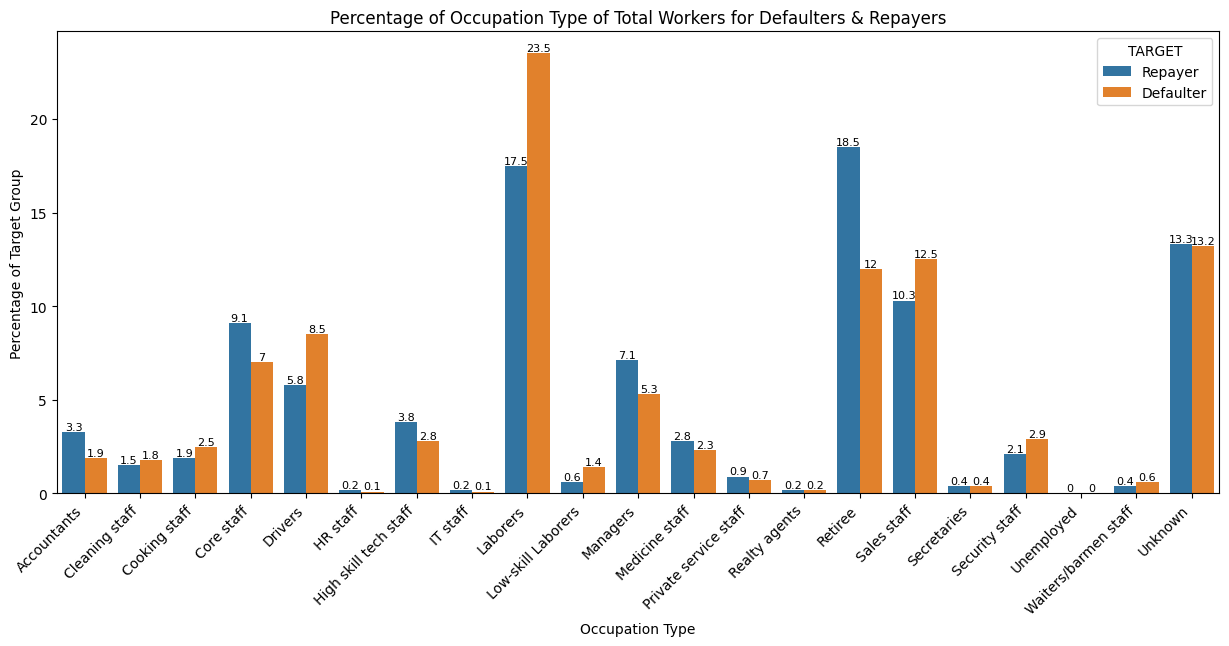

In [95]:
plt.figure(figsize=(15,6))
ax = sns.barplot(
    x=percentage_workforce['OCCUPATION_TYPE'],
    y=percentage_workforce['percentage_workforce_by_group'],
    hue=percentage_workforce['TARGET'],
    errorbar=('ci', False));
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)

plt.xticks(rotation=45, horizontalalignment='right');
plt.title("Percentage of Occupation Type of Total Workers for Defaulters & Repayers")
plt.ylabel('Percentage of Target Group')
plt.xlabel('Occupation Type');

The data indicates that the distribution of occupations among those who took out loans are similar, however, it seems that out of those who are making late payments, laborers make up a higher percentage

We should look more closely at occupation type and how it affects loan payments, maybe more caution should be taken with laborers

<h4>Numerical columns correlation tests</h4>

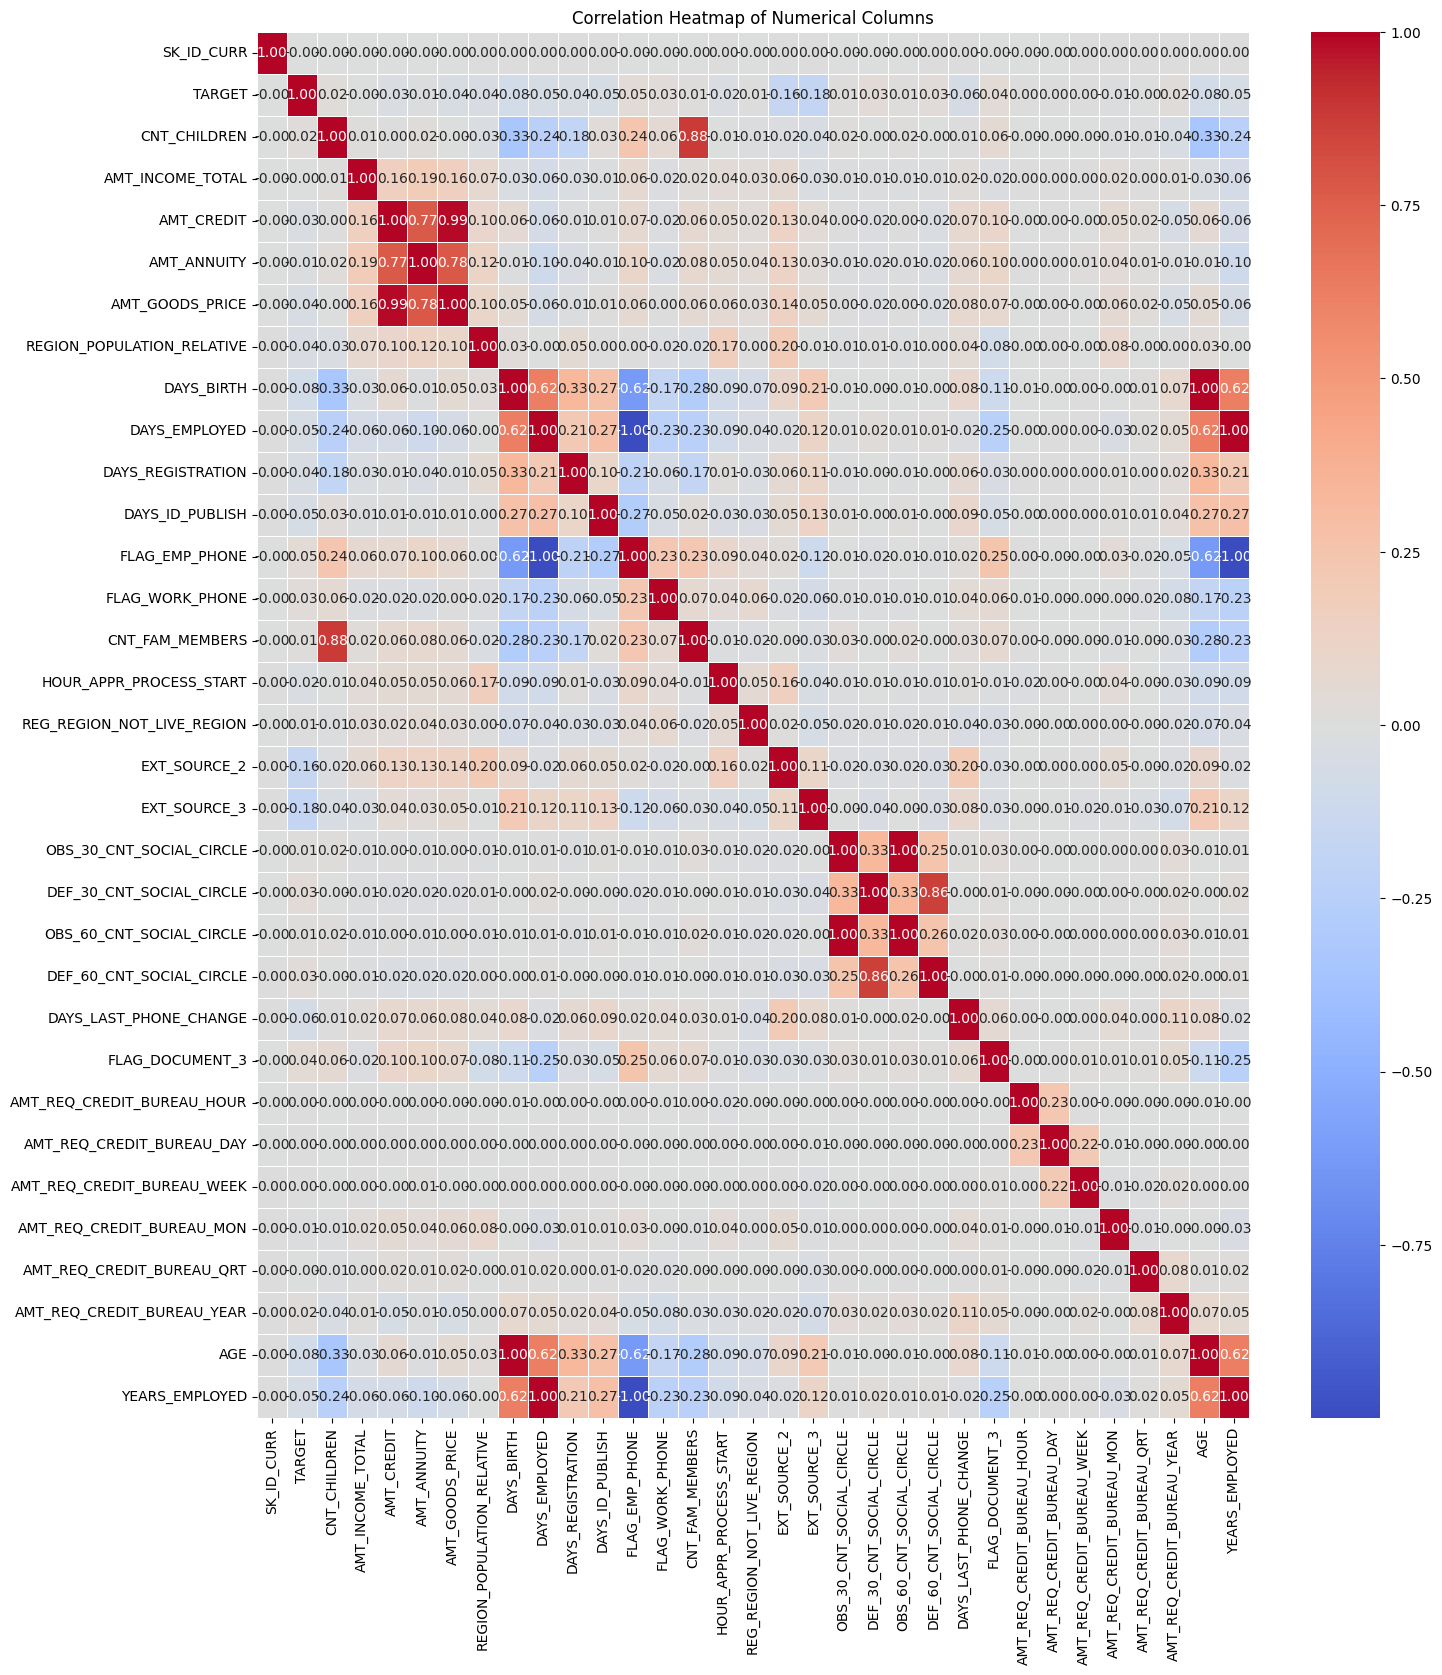

In [96]:
# Correlation matrices of numerical variables
df_numerical = df_dropped.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(16, 18))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.4);
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# print(df_dropped['HOUR_APPR_PROCESS_START'])
# Note: Hour appr process start is a categorical variable, so it should be converted to a categorical variable

We see that from the correlation matrix that there is a strong correlation between the following variables:Amount Credit and amount good price, count of children and count of family members, region rating cliend and region rating client with city, registered region but not working region and living region but not working region, observed 30 count social circle and observed 60 count social circle, default 30 count social circle and default 60 count social circle.

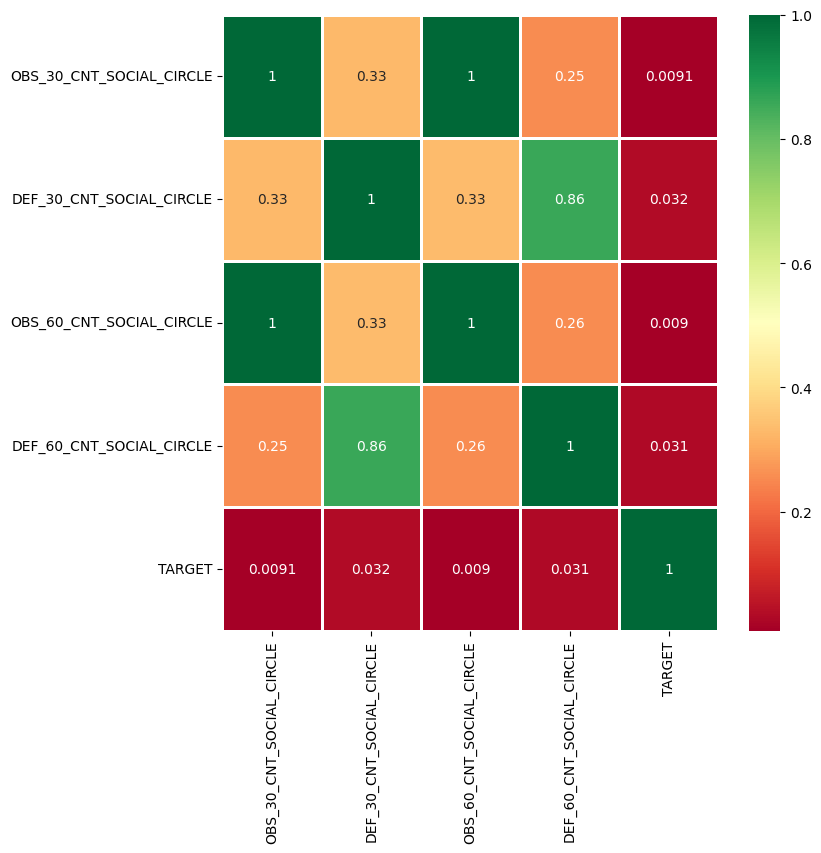

In [97]:
contact_col = ['OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET']
Contact_corr = df_dropped[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

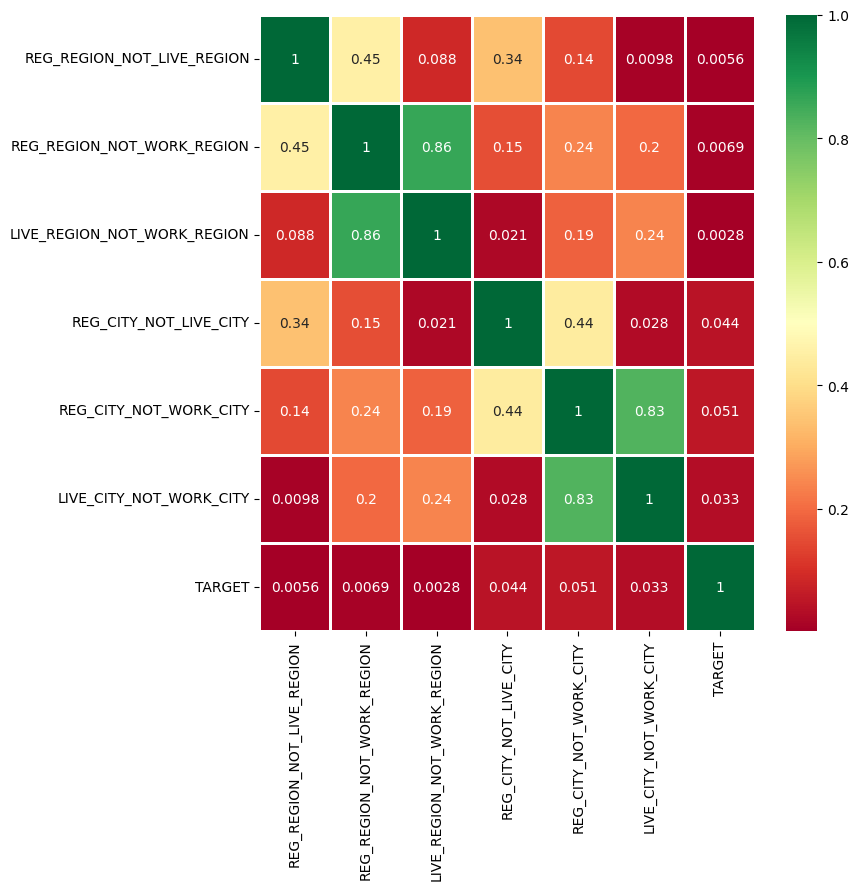

In [98]:
contact_col = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TARGET']
Contact_corr = df_dropped[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

<h4> Categorical columns correlation/association tests</h4>

We are checking to see if any of the categorical columns are associated with one another to possibly remove some because we are planning on doing one-hot encoding, which will take up a lot of data with a set of this size

In [99]:
# # Correlation of categorical variables
# # Convert hour approximately application start to categorical
# df_dropped['HOUR_APPR_PROCESS_START'] = df_dropped['HOUR_APPR_PROCESS_START'].astype('object')
# print(df_dropped.select_dtypes(include=['object']).columns)

# def cramers_v(x,y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2,_,_,_ = chi2_contingency(confusion_matrix)

In [100]:
# creating a dataframe with only the columns that contain strings
df_categorical = df_dropped.select_dtypes(include=['category'])
list_categorical = list(df_categorical.columns)
list_categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'AGE_GROUP',
 'EMPLOYMENT_YEAR']

<h5>Chi-squared</h5>

In [101]:
# chi squared example
crosstab_result = pd.crosstab(index=df_dropped['CODE_GENDER'], columns=df_dropped['FLAG_OWN_REALTY'])
chisq = scipy.stats.chi2_contingency(crosstab_result)
chisq.statistic


np.float64(605.296815347434)

In [102]:
# function to find the correlation between all the categorical variables and appending that result into a datafram
def categorical_corr_chisq(columns_list):
    list = []
    for col_one in columns_list:
        for col_two in columns_list:
            crosstab_result = pd.crosstab(index=df_dropped[col_one], columns=df_dropped[col_two])
            chisq = scipy.stats.chi2_contingency(crosstab_result)

            list.append({'col_one': col_one, 'col_two': col_two, 'p-value': chisq.pvalue})

            # print("The association variable between",crosstab_result.index.name,"and",crosstab_result.columns.name,"is:",round(association_metric*100, 2))
    return pd.DataFrame(list)

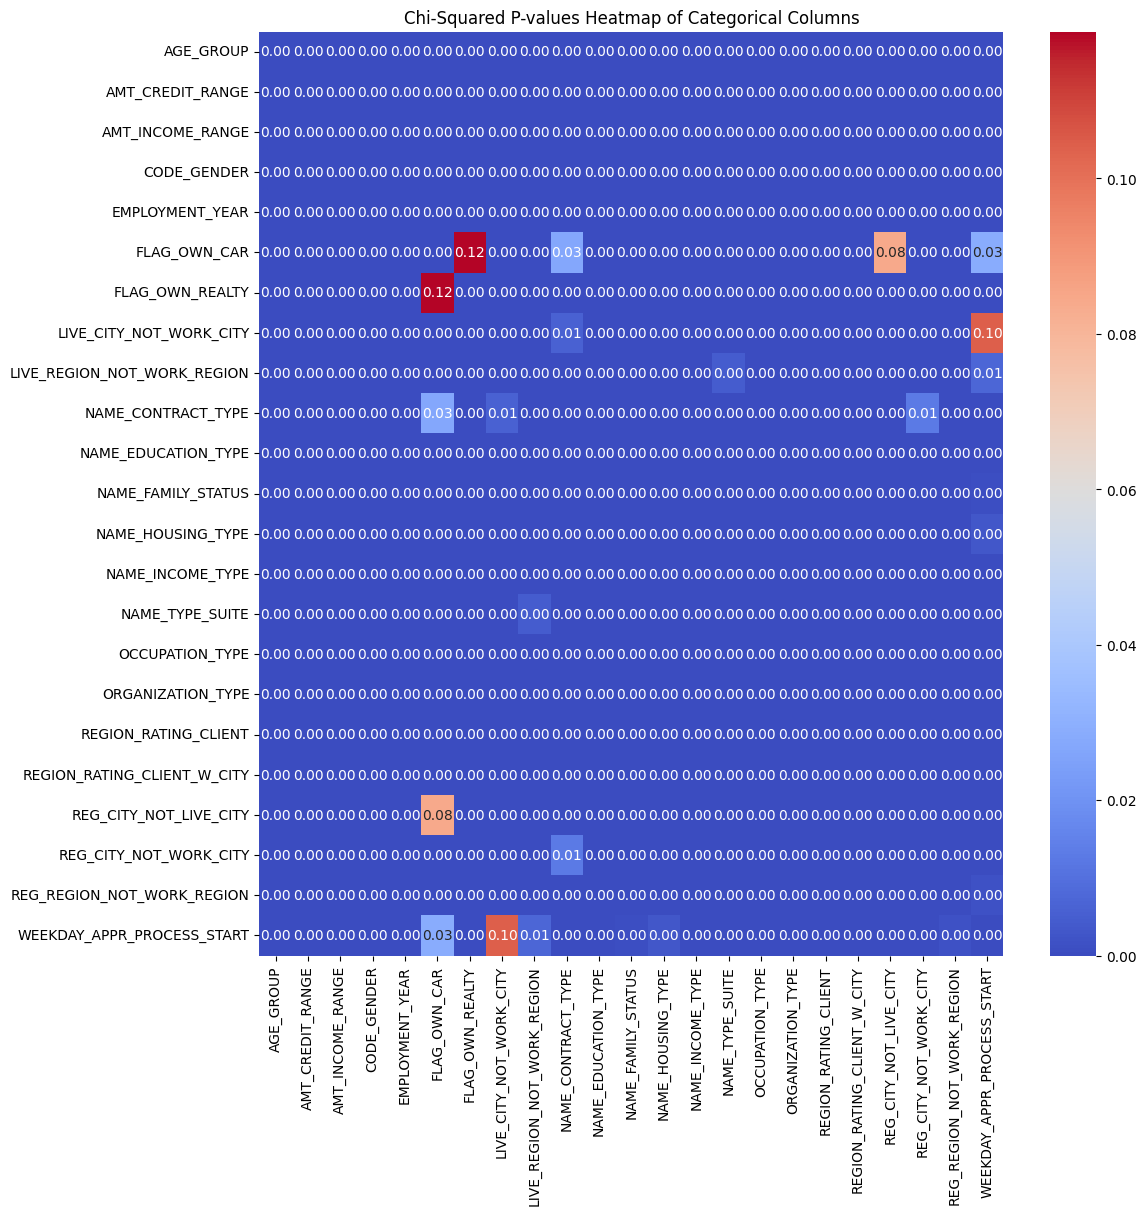

In [103]:
# calling the function and pivoting the table to a format the heatmap function can use
categorical_df_chisq = categorical_corr_chisq(list_categorical)

categorical_map_cramers = categorical_df_chisq.pivot(index='col_one', columns='col_two', values='p-value')

# creating a heatmap for the correlation of the categorical variables
plt.figure(figsize=(12,12))  # Adjust the figure size as needed
ax = sns.heatmap(categorical_map_cramers, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Chi-Squared P-values Heatmap of Categorical Columns')
ax.set(xlabel='', ylabel='');

Based on the results of the chi-squared test, we can see that the only test where we must Fail to Reject the Null Hypothesis is between FLAG_OWN_CAR and FLAG_OWN_REALTY. In all other cases we Reject the Null Hypothesis showing that the results of the following Cramer's V association test are significant and interpretable.

<h5>Cramer's V</h5>

In [104]:
# Cramer's V example

crosstab_result_edu_v_occ = pd.crosstab(index=df_dropped['NAME_EDUCATION_TYPE'], columns=df_dropped['OCCUPATION_TYPE'])
association_metric = scipy.stats.contingency.association(crosstab_result_edu_v_occ)

print("The association variable between",crosstab_result_edu_v_occ.index.name,"and",crosstab_result_edu_v_occ.columns.name,"is:",association_metric)

The association variable between NAME_EDUCATION_TYPE and OCCUPATION_TYPE is: 0.19805664603767872


In [105]:
# function to find the correlation between all the categorical variables and appending that result into a datafram
def categorical_corr_cramers(columns_list):
    list = []
    for col_one in columns_list:
        for col_two in columns_list:
            crosstab_result = pd.crosstab(index=df_dropped[col_one], columns=df_dropped[col_two])
            association_metric = scipy.stats.contingency.association(crosstab_result, method='cramer')

            list.append({'col_one': col_one, 'col_two': col_two, 'assc': association_metric})

            # print("The association variable between",crosstab_result.index.name,"and",crosstab_result.columns.name,"is:",round(association_metric*100, 2))
    return pd.DataFrame(list)

In [106]:
# calling the function and pivoting the table to a format the heatmap function can use
categorical_df_cramers = categorical_corr_cramers(list_categorical)

categorical_map_cramers = categorical_df_cramers.pivot(index='col_one', columns='col_two', values='assc')

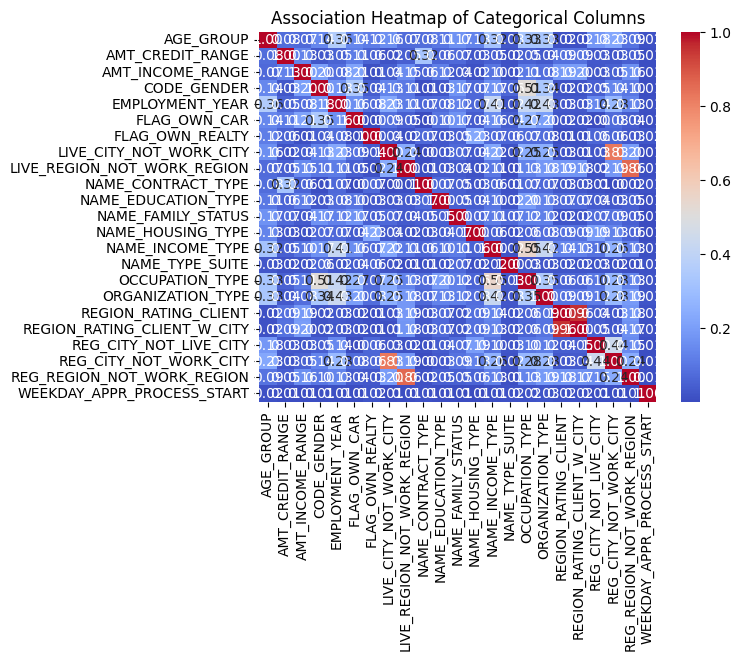

In [107]:
# creating a heatmap for the correlation of the categorical variables
ax = sns.heatmap(categorical_map_cramers, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Association Heatmap of Categorical Columns')
ax.set(xlabel='', ylabel='');

- where I found this strat: https://stackoverflow.com/questions/74411668/how-to-calculate-the-correlation-between-two-categorical-variables-in-python
- Cramer's V explanation: https://www.reddit.com/r/explainlikeimfive/comments/a0igip/eli5_what_does_cramers_v_actually_measure_and/

The results of the Cramer's V test show that most categorical variables are not associated with one another. There are slight associations between...
- FLAG_OWN_CAR and CODE_GENDER
- OCCUPATION_TYPE and CODE_GENDER
- ORGANIZATION_TYPE and NAME_INCOME_TYPE
    - This makes sense because a clients income type is often dependent on the type of organizationt they work for 

In [108]:
# # Convert days birth and days employed to years
# df_dropped['DAYS_BIRTH'] = abs(df_dropped['DAYS_BIRTH']) // 365
# df_dropped.rename(columns = {'DAYS_BIRTH':'Age_years'}, inplace = True)

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\48051326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['HOUR_APPR_PROCESS_START'] = df_dropped['HOUR_APPR_PROCESS_START'].astype('object')
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\48051326.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binaries.dropna(inplace=True)
C:\Users\parks\AppData\Local\Temp\ipykernel_27476\48051326.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

Index(['HOUR_APPR_PROCESS_START'], dtype='object')


Text(0.5, 1.0, 'Phi Coefficient Correlation Matrix')

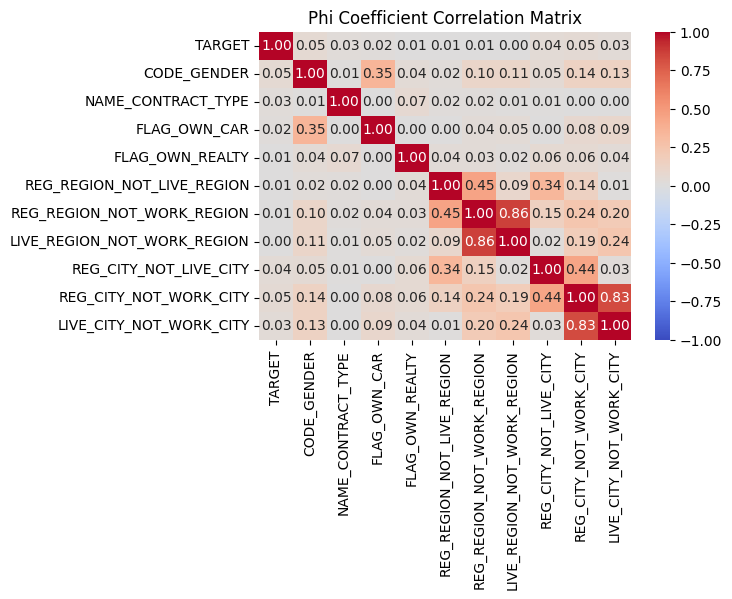

In [109]:
# Correlation of binary categorical variables
# Convert hour approximately application start to categorical
df_dropped['HOUR_APPR_PROCESS_START'] = df_dropped['HOUR_APPR_PROCESS_START'].astype('object')
print(df_dropped.select_dtypes(include=['object']).columns)

def is_binary(series):
    return series.nunique() == 2

df_dropped.pipe(is_binary)
# Name_CONTRACT_TYPE: Cash loans or revolving loans
# Flag_OWN_CAR: Yes or No
# Flag_OWN_REALTY: Yes or No
# Flag_WORK_PHONE: 1 or 0
# REG_REGION_NOT_LIVE_REGION: 1 or 0     
# REG_REGION_NOT_WORK_REGION: 1 or 0
# LIVE_REGION_NOT_WORK_REGION: 1 or 0
# REG_CITY_NOT_LIVE_CITY: 1 or 0
# REG_CITY_NOT_WORK_CITY: 1 or 0  
# LIVE_CITY_NOT_WORK_CITY: 1 or 0
# POTENTIALLY GENDER, might have to drop some rows that put XNA M and F



def phi_coefficient(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / n)


binary_columnns = ['TARGET','CODE_GENDER','NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df_binaries = df_dropped[binary_columnns]
df_binaries.dropna(inplace=True)
df_binaries.drop(df_binaries[df_binaries['CODE_GENDER'] == 'XNA'].index, inplace=True)

binary_correlation_matrix = pd.DataFrame(index=df_binaries.columns, columns=df_binaries.columns)

for col1 in df_binaries.columns:
    for col2 in df_binaries.columns:
        binary_correlation_matrix.loc[col1, col2] = phi_coefficient(df_binaries[col1], df_binaries[col2])

plt.figure(figsize=(6, 4))
sns.heatmap(
    binary_correlation_matrix.astype(float), 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1,
    fmt=".2f"
)
plt.title("Phi Coefficient Correlation Matrix")

We can see that there is correlation between REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION and REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY

## Removing Redundant Columns

- Dropping AMT_GOODS_PRICE in favor of AMT_CREDIT because they are highly correlated and AMT_CREDIT has less null values
- Dropping CNT_CHILDREN in favor of CNT_FAMILY because CNT_FAMILY is inclusive of the number of children
- Dropping REGION_RATING_CLIENT in favor of REGION_RATING_CLIENT_W_CITY because they are highly correlated
- Dropping REG_CITY_NOT_WORK_CITY in favor of LIVE_CITY_NOT_WORK_CITY because they are highly correlated and it seems that the registration city is often the city the client lives in
- Dropping OBS_30_CNT_SOCIAL in favor of OBS_60_CNT_SOCIAL
- Dropping DEF_30_CNT_SOCIAL in favor of DEF_60_CNT_SOCIAL

In [110]:
df_dropped

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR
0           100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120               1                0        Laborers              1.0                    2                           2                  WEDNESDAY                      10                           0                          0                           0                      0                      0                       0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                  1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0        200k-300k        400k-500k   25     20-30        1.745205             0-5
1           100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291               1                0      Core staff              2.0                    1                           1                     MONDAY                      11                           0                          0                           0                      0                      0                       0                  School      0.622246           NaN                       1.0                       0.0                       1.0                       0.0                   828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        200k-300k         1M Above   45     40-50        3.254795             0-5
2           100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531               1                1        Laborers              1.0                    2                           2                     MONDAY                       9                           0                          0                           0                      0   

In [111]:
redundant_columns = ['AMT_GOODS_PRICE', 'REGION_RATING_CLIENT',
                     'REG_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']

In [112]:
df_dropped.drop(labels=redundant_columns, axis=1, inplace=True)

C:\Users\parks\AppData\Local\Temp\ipykernel_27476\1090440809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.drop(labels=redundant_columns, axis=1, inplace=True)


## Exporting Data

In [113]:
from dotenv import load_dotenv

load_dotenv()

dataset_path = os.getenv('CLEANED_DATA_PATH')

df_dropped.to_csv(dataset_path, index=False)